# Introduction to Explanatory Data Analysis

------------------------------------------------------

## Applications of Machine Learning

**Vanessa Gómez Verdejo** vanessag@ing.uc3m.es






# Feature Engineering

Data scientists and ML engineers frequently gather data in order to solve a problem. Because the problem they are attempting to solve is often highly relevant and exists and occurs naturally in this messy world, the data that is meant to represent the problem can also end up being quite **messy** and **unfiltered**, and often **incomplete**.

At this point is where the Feature Engineering emerges. **Feature engineering** consists in designing architectures to handle and transform data into features that better represent the underlying problem, resulting in improved ML performance. It is a task that is imperative to having successful and production-ready ML pipelines. 

In this first block of the course, we are going to explore four major aspects of feature engineering:
* **Feature understanding**: learning how to identify data based on its qualities and quantitative state
* **Feature improvement**: cleaning and imputing missing data values in order to maximize the dataset's value.
* **Feature selection**: statistically selecting and subsetting feature sets in order to reduce the noise in our data.
* **Feature construction/transformation**: extracting hidden (latent) structure within datasets in order to mathematically transform our datasets into something new (and usually better).

In this notebook, we are going to review this first **feature understanding** stage. During next weeks we will continue with the next steps with other devoted notebooks.

## What’s in my dataset?

**Understanding the features** that we are working with is step zero of feature engineering. By understanding the data in front of us, we can start to have a better idea of where to go next. If we cannot understand the data given to us, we will never hope to fix, create, and utilize features in order to create well-performing ML pipelines. 

In this first session, we are going to review some useful libraries to start loading our datasets and to carry out a first **Data Explanatory Analysis (DEA)** which help us to understand the data we have to deal.

In this notebook we will introduce several Python libraries to be used for the DEA. In particular, these libraries will help us to: 
* Deal with **different data formats**. We will review some libraries to work with numpy arrays, pandas dataframes, sparse matrices.
* **Data visualization**. We will present the main functionalities of matplotlib and seaborn.


___________________________________________________________________
Part of the content of this notebook is material of the Introduction to Python course from the Master in Information Health Engineering (*Vanessa Gómez Verdejo vanessa@tsc.uc3m.es*, *Pablo M. Olmos olmos@tsc.uc3m.es* and *Harold Molina Bulla h.molina@tsc.uc3m.es*)




# 1. Getting started with Numpy



[**Numerical Python**](http://www.numpy.org/) is the fundamental package for scientific computing with Python. It contains among other things:

- a powerful N-dimensional array object
- sophisticated (broadcasting) functions tools for integrating C/C++ and Fortran code
- useful linear algebra, Fourier transform, and random number capabilities

Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data. Arbitrary data-types can be defined. This allows NumPy to seamlessly and speedily integrate with a wide variety of databases.

Let's load the library and review the numpy funcionalities with some examples.

In [1]:
import numpy as np  
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)}) #To set the number of printed decimals to 3

## Creating Arrays

Numpy is a python library that let's you work with data vectors and matrices (we will call them numpy arrays) and directly apply operations over these arrays without the need to **operate element by element**.

Numpy arrays can be defined directly using methods such as `np.arange()`, `np.ones()`, `np.zeros()`, `np.eye()`, as well as random number generators. Alternatively, you can easily generate them from python lists (or lists of lists) containing elements of a numerical type by using `np.array(my_list)`.


### 1-dimensional arrays (vectors)

In [2]:
v1=np.array([2,4,6]) #The default type is int32 or int64 since we did not use any decimal point

print("The type of v1: ", v1.dtype)

v2=np.array([2.0,4.0,6.0])

print("The type of v2: ", v2.dtype)

v3=np.array([2,4,6],dtype=np.float32)

print("The type of v1: ", v3.dtype)

print(v1)

The type of v1:  int32
The type of v2:  float64
The type of v1:  float32
[2 4 6]


The array we just created is a **vector** or **one-dimensional** array, it is characterized by a single dimension: (Note the empty second entry when we call the method `.shape()`)

In [3]:
print(v1.shape)

print(v1[2])

# Now we transform v1 into a 2 dimensional array (a matrix with a single column)
v1 = np.reshape(v1,[v1.shape[0],1])

print(v1.shape)

(3,)
6
(3, 1)


More examples with useful functions ...

In [4]:
# The arange() function generates vectors of equally spaced numbers. We can 
# specify start and stop positions as well as the step length (the steps don't 
# need to be integers!):
print('A vector that goes from 2 to 8 in steps of 2: ', np.arange(2, 9, 2))

# Numpy also has a linspace() function that works exactly like its Matlab 
# counterpart:
print('\nA vector of length 5 that spans from 0 to 1 in constant increments:\n', 
      np.linspace(0, 1, 5))

# or log-spaced data
print('\nA vector of length 5 that spans from 0.01 to 100 in log-scale increments:\n', 
      np.logspace(-2, 2, 5))

A vector that goes from 2 to 8 in steps of 2:  [2 4 6 8]

A vector of length 5 that spans from 0 to 1 in constant increments:
 [0.000 0.250 0.500 0.750 1.000]

A vector of length 5 that spans from 0.01 to 100 in log-scale increments:
 [0.010 0.100 1.000 10.000 100.000]


We can also convert a numpy array or matrix into a python list with the method `np.tolist()`.

In [5]:
my_array = np.arange(9).reshape((3, 3))
print(my_array)
print('the type is: ', type(my_array))

# Convert my_array to list

my_array_list =  my_array.tolist()
print('\n', my_array_list)
print('the type is: ',type(my_array_list))

[[0 1 2]
 [3 4 5]
 [6 7 8]]
the type is:  <class 'numpy.ndarray'>

 [[0, 1, 2], [3, 4, 5], [6, 7, 8]]
the type is:  <class 'list'>


## Arrays (matrices or tensors)

To correctly operate with numpy arrays we have to be aware of their dimensions. Are these two arrays  equal?

In [6]:
array1 = np.array([1,1,1])
print('array1:\n', array1)

array2 = np.ones((3,1))
print('\narray2:\n', array2)

array1:
 [1 1 1]

array2:
 [[1.000]
 [1.000]
 [1.000]]


The answer is **no**. We can easily check this by examining their shapes and dimensions:

In [7]:
print('Shape of array1 :',array1.shape)
print('Number of dimensions of array1 :',array1.ndim)
print('Shape of array2 :',array2.shape)
print('Number of dimensions of array2 :',array2.ndim)

Shape of array1 : (3,)
Number of dimensions of array1 : 1
Shape of array2 : (3, 1)
Number of dimensions of array2 : 2


Effectively, `array1` is a 1D array, whereas `array2` is a 2D  array.  There are some methods that will let you modify the dimensions of an array. To go from a 2-D to 1-D array we have the methods `flatten()`, `ravel()` and `reshape()`. Check the result of the following code (you can use the help function to check the funcionalities of each method).

In [8]:
x1 = np.arange(9).reshape((3, 3))
print('x1:\n', x1)
print('Its shape is: ', x1.shape)

print('\n Use the method flatten:')
print('x1.flatten(): ', x1.flatten())
print('Its shape is: ', x1.flatten().shape)

print('\n Use the method ravel:')
print('x1.ravel(): ', x1.ravel())
print('Its shape is:', x1.ravel().shape)

print('\n Use the method reshape:')
# With the value -1 to let numpy calculate the right size
print('x1.reshape(-1): ', x1.reshape(-1)) 
print('Its shape is: ', x1.reshape(-1).shape)


# Note that here the method reshape is used to reorganize the array into a 1-D 
# array. A more common use of reshape() is to simply redimension an array from 
# shape (i, j) to shape (i', j') satisfying the condition i*j = i'*j'.
# For example:
print('\n A more common use of reshape():')
x1 = np.arange(12).reshape((4, 3))
print('x1:\n', x1)
print('Its shape is: ', x1.shape)

print('\nx1.reshape((2,6)):\n', x1.reshape((2,6)))
print('Its shape is: ', x1.reshape((2,6)).shape)

x1:
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
Its shape is:  (3, 3)

 Use the method flatten:
x1.flatten():  [0 1 2 3 4 5 6 7 8]
Its shape is:  (9,)

 Use the method ravel:
x1.ravel():  [0 1 2 3 4 5 6 7 8]
Its shape is: (9,)

 Use the method reshape:
x1.reshape(-1):  [0 1 2 3 4 5 6 7 8]
Its shape is:  (9,)

 A more common use of reshape():
x1:
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
Its shape is:  (4, 3)

x1.reshape((2,6)):
 [[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]
Its shape is:  (2, 6)


Note: `flatten()` always returns a copy of the original vector, whereas `ravel()` and `shape()` returns a view of the original array whenever possible. 

Sometimes we need to add a new dimension to an array, for example to turn a  1-D array into a 2-D column vector. For this we use `np.newaxis`.

In [9]:
# Let's start with a 1-D array:
array1 = np.array([1,1,1])
print('1D array:\n',array1)
print('Its shape is: ', array1.shape)

# Let's turn it into a column vector (2-D array with dimension 1x3):
array2 = array1[:,np.newaxis]
print('\n2D array:\n',array2)
print('Its shape is: ', array2.shape)

# Let's turn it into a row vector (2-D array with dimension 3x1):
array3 = array1[np.newaxis,:]
print('\n2D array:\n',array3)
print('Its shape is: ', array3.shape)

1D array:
 [1 1 1]
Its shape is:  (3,)

2D array:
 [[1]
 [1]
 [1]]
Its shape is:  (3, 1)

2D array:
 [[1 1 1]]
Its shape is:  (1, 3)


We might also need to remove empty or unused dimensions. For this we have `np.squeeze()`:

In [10]:
array1_1D = np.squeeze(array1)
print('1D array:\n',array1_1D)
print('Its shape is: ', array1_1D.shape)

array2_1D = np.squeeze(array2)
print('\n1D array:\n',array2_1D)
print('Its shape is: ', array2_1D.shape)

array3_1D = np.squeeze(array3)
print('\n1D array:\n',array3_1D)
print('Its shape is: ', array3_1D.shape)

1D array:
 [1 1 1]
Its shape is:  (3,)

1D array:
 [1 1 1]
Its shape is:  (3,)

1D array:
 [1 1 1]
Its shape is:  (3,)


We can create matrices where all elements are drawn from an iid normal distribution ...

In [11]:
m1=np.random.randn(3,5)

print ("m1=%r \n\n is a matrix, where each elemet is iid sampled from a standard normal distribution. Its size is %r" %(m1,m1.shape))

m1=array([[0.719, 0.018, 0.543, -0.608, -0.368],
       [-1.342, 1.843, -0.465, 0.381, -0.394],
       [-1.525, 1.369, -0.207, -0.741, -1.140]]) 

 is a matrix, where each elemet is iid sampled from a standard normal distribution. Its size is (3, 5)


In [12]:
m1.shape

(3, 5)

We can create tensors (matrices with more than 2 dimensiones). Here, there is an example. B is a tensor where the first dimension spans three different 2x2 matrices.

In [13]:
B = np.array([ [[111, 112], [121, 122]],
               [[211, 212], [221, 222]],
               [[311, 312], [321, 322]] ])

print(B)
print("Dimension of B: ", np.ndim(B))
print(np.shape(B))

[[[111 112]
  [121 122]]

 [[211 212]
  [221 222]]

 [[311 312]
  [321 322]]]
Dimension of B:  3
(3, 2, 2)


## Indexing and slicing


Remember that the first element is indexed by 0 ...

In [14]:
F = np.array([1, 1, 2, 3, 5, 8, 13, 21])
# print the first element of F, i.e. the element with the index 0
print(F[0])
# print the last element of F
print(F[-1])

1
21


In [15]:
B = np.array([ [[111, 112], [121, 122]],
               [[211, 212], [221, 222]],
               [[311, 312], [321, 322]] ])
print(B)
print(B[0,1,0])

[[[111 112]
  [121 122]]

 [[211 212]
  [221 222]]

 [[311 312]
  [321 322]]]
121


### Slicing

In numpy, slicing means selecting and/or accessing specific array rows and columns.

Particular elements of numpy arrays (both unidimensional and multidimensional) can be accessed using standard python slicing. When working with multidimensional arrays, slicing can be carried out along several different dimensions at once.

In [16]:
S = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(S[0:4])
print(S[:4])
print(S[6:])
print(S[:])
print(S[-2:])
print(S[:-3])

[0 1 2 3]
[0 1 2 3]
[6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[8 9]
[0 1 2 3 4 5 6]


In [17]:
A = np.array([
[11,12,13,14,15],
[21,22,23,24,25],
[31,32,33,34,35],
[41,42,43,44,45],
[51,52,53,54,55]])
print("")
print(A)
print("")
print(A[:3,2:])
print("")
print(A[3:,:])
print("")
print(A[:,4:])


[[11 12 13 14 15]
 [21 22 23 24 25]
 [31 32 33 34 35]
 [41 42 43 44 45]
 [51 52 53 54 55]]

[[13 14 15]
 [23 24 25]
 [33 34 35]]

[[41 42 43 44 45]
 [51 52 53 54 55]]

[[15]
 [25]
 [35]
 [45]
 [55]]


We have seen how slicing allows us to index over the different dimensions of a given array. In the previous examples we learned how to select the rows and columns we're interested in, but how can we select only the elements of an array that meet a specific condition?

Numpy provides us with the method `np.where(condition)`. A common way of using this function is by setting a condition involving an array. For example, the condition x > 5 will give us the indexes in which x contains numbers higher than 5. 

In [18]:
x = np.array([-3,-2,-1,0,1,2,3])

# Create a new vector `y` with the elements of x, but replacing by 0 each number whose
# absolute value is 2 or less.

y = np.copy(x) # CAUTION! Doing y = x will create two pointers to the same array.
condition = np.abs(x)<=2 
y[np.where(condition)[0]]=0
# Note that np.where() returns a tuple. In this case the second element of the 
# tuple is empty. Read the np.where() docstring for more info.

print('Before conditioning: \n',x)
print('\nAfter conditioning: \n',y)

Before conditioning: 
 [-3 -2 -1  0  1  2  3]

After conditioning: 
 [-3  0  0  0  0  0  3]


Note that the following indexing is also valid, but the result is different from what we get when using `np.where()`

In [19]:
print(x[condition])

[-2 -1  0  1  2]


## Concatenating arrays

Provided that the corresponding dimensions fit, horizontal and vertical stacking of matrices can be carried out with methods `np.hstack()` and `np.vstack()`.

In [20]:
my_array = np.array([[1, -1, 3, 3],[2, 2, 4, 6]])
print('Array 1:')
print(my_array)
print(my_array.shape)

my_array2 = np.ones((2,3))
print('Array 2:')
print(my_array2)
print(my_array2.shape)


# Vertically stack matrix my_array with itself
ex1_res = np.vstack((my_array,my_array))
print('Vertically stack:')
print(ex1_res)

# Horizontally stack matrix my_array and my_array2
ex2_res = np.hstack((my_array,my_array2))
print('Horizontally stack:')
print(ex2_res)

# Transpose the vector `my_array`, and then stack a ones vector
# as the first column. Alternatively, you can stack a row, and then transpose. 
# Just make sure that the final shape is (4,3). Name it `expanded`:

ones_v = np.ones((my_array.shape[1],1))
expanded = np.hstack((ones_v, my_array.T))

print('Expanded array: \n',expanded)
print('Its shape is: \n', expanded.shape)

Array 1:
[[ 1 -1  3  3]
 [ 2  2  4  6]]
(2, 4)
Array 2:
[[1.000 1.000 1.000]
 [1.000 1.000 1.000]]
(2, 3)
Vertically stack:
[[ 1 -1  3  3]
 [ 2  2  4  6]
 [ 1 -1  3  3]
 [ 2  2  4  6]]
Horizontally stack:
[[1.000 -1.000 3.000 3.000 1.000 1.000 1.000]
 [2.000 2.000 4.000 6.000 1.000 1.000 1.000]]
Expanded array: 
 [[1.000 1.000 2.000]
 [1.000 -1.000 2.000]
 [1.000 3.000 4.000]
 [1.000 3.000 6.000]]
Its shape is: 
 (4, 3)


## Some operations with arrays

### Element-wise operations

We can perform all the usual numerical and matrix operations with numpy. In the case of matrix addition and subtraction, we can use the common "`+`" or "`-`" operators.

In [21]:
x1 = np.arange(9).reshape((3, 3))
x2 = np.ones((3, 3))
result = x1 + x2
print('x1:\n', x1, '\n\nx2:\n', x2)
print('\nAddition of x1 and x2 using the + operator:\n', result)

x1:
 [[0 1 2]
 [3 4 5]
 [6 7 8]] 

x2:
 [[1.000 1.000 1.000]
 [1.000 1.000 1.000]
 [1.000 1.000 1.000]]

Addition of x1 and x2 using the + operator:
 [[1.000 2.000 3.000]
 [4.000 5.000 6.000]
 [7.000 8.000 9.000]]


However, numpy provides us with built-in functions that guarantee that any errors and exceptions are handled properly:

In [22]:
# We can add two arrays:
x1 = np.arange(9).reshape((3, 3))
x2 = np.ones((3, 3))
result = np.add(x1, x2)
print('x1:\n', x1, '\n\nx2:\n', x2)
print('\nAddition of x1 and x2 using built-in functions:\n', result)

# Or compute the difference:
result = np.subtract(x1, x2)
print('\nSubtraction of x1 and x2 using built-in functions:\n', result)

x1:
 [[0 1 2]
 [3 4 5]
 [6 7 8]] 

x2:
 [[1.000 1.000 1.000]
 [1.000 1.000 1.000]
 [1.000 1.000 1.000]]

Addition of x1 and x2 using built-in functions:
 [[1.000 2.000 3.000]
 [4.000 5.000 6.000]
 [7.000 8.000 9.000]]

Subtraction of x1 and x2 using built-in functions:
 [[-1.000 0.000 1.000]
 [2.000 3.000 4.000]
 [5.000 6.000 7.000]]


We can also add or subtract column or row vectors from arrays. Again, both the basic operators and the built in functions will perform the same operations. Unlike in Matlab, where this operation will raise an error, Python will automatically execute it row by row or column by column as appropriate:

In [23]:
# We can add or subtract row and column vectors:
row_vect = np.ones((1, 3))
col_vect = np.ones((3, 1))
result = np.add(x1, row_vect)
print('x1:\n', x1, '\n\nrow_vect:\n', row_vect, '\n\ncol_vect:\n', col_vect)
print('\nAddition of a row vector:\n', result)
result = np.add(x1, col_vect)
print('\nAddition of a column vector:\n', result)

x1:
 [[0 1 2]
 [3 4 5]
 [6 7 8]] 

row_vect:
 [[1.000 1.000 1.000]] 

col_vect:
 [[1.000]
 [1.000]
 [1.000]]

Addition of a row vector:
 [[1.000 2.000 3.000]
 [4.000 5.000 6.000]
 [7.000 8.000 9.000]]

Addition of a column vector:
 [[1.000 2.000 3.000]
 [4.000 5.000 6.000]
 [7.000 8.000 9.000]]


Another key difference with Matlab is that the "`*`" operator won't give us matrix multiplication. It will instead compute an element-wise multiplication. Again, numpy has a built-in function, `np.multiply()`, for this purpose that will guarantee proper handling of errors:

In [24]:
# We can perform element-wise multiplication by using the * operator:
x1 = np.arange(9).reshape((3, 3))
x2 = np.ones((3, 3)) * 2 # a 3x3 array with 2s in every cell
result = x1 * x2
print('x1:\n', x1, '\n\nx2:\n', x2)
print('\nElement-wise multiplication of x1 and x2 using the * operator:\n', result)

# or by using the built-in numpy function:
result = np.multiply(x1, x2)
print('\nElement-wise multiplication of x1 and x2 using built-in functions:\n', result)


x1:
 [[0 1 2]
 [3 4 5]
 [6 7 8]] 

x2:
 [[2.000 2.000 2.000]
 [2.000 2.000 2.000]
 [2.000 2.000 2.000]]

Element-wise multiplication of x1 and x2 using the * operator:
 [[0.000 2.000 4.000]
 [6.000 8.000 10.000]
 [12.000 14.000 16.000]]

Element-wise multiplication of x1 and x2 using built-in functions:
 [[0.000 2.000 4.000]
 [6.000 8.000 10.000]
 [12.000 14.000 16.000]]


Some other useful element-wise operators ...

In [25]:
#Elementwise operations over vector and matrices ...

M=np.random.randint(2,10,m1.shape)

print (M)

#We can use the "`**`" operator or the `power()` built-in function 
#to raise elements from a matrix to a given power, 
#or to raise elements of one matrix to 
#positionally-corresponding powers in another matrix:
    
print (M**2) #square each element of m3

#Element-wise division between matrices is performed using the 
#''`/`'' operator or the  `divide()` built-in function
print(M/M)

print(np.log(M))

print(np.exp(M))

[[4 8 9 3 7]
 [9 5 2 7 5]
 [6 9 9 2 7]]
[[16 64 81  9 49]
 [81 25  4 49 25]
 [36 81 81  4 49]]
[[1.000 1.000 1.000 1.000 1.000]
 [1.000 1.000 1.000 1.000 1.000]
 [1.000 1.000 1.000 1.000 1.000]]
[[1.386 2.079 2.197 1.099 1.946]
 [2.197 1.609 0.693 1.946 1.609]
 [1.792 2.197 2.197 0.693 1.946]]
[[54.598 2980.958 8103.084 20.086 1096.633]
 [8103.084 148.413 7.389 1096.633 148.413]
 [403.429 8103.084 8103.084 7.389 1096.633]]


## Matrix multiplication, inversion and pseudo-inverse

Numpy also gives us funtions to perform matrix multiplications and dot products. The `np.dot()` function is very powerful and can perform a number of different operations depending on the nature of the input arguments. For example, if we give it a pair of matrices (2D-arrays) of adequate dimensions, it will perform the same operation as `np.matmul()`.

In [26]:
x1 = np.arange(9).reshape((3, 3))
x2 = np.ones((3, 3)) * 2 # a 3x3 array with 2s in every cell
result = np.matmul(x1, x2)
print('x1:\n', x1, '\n\nx2:\n', x2)
print('\nProduct of x1 and x2 using np.matmul():\n', result)

result = np.dot(x1, x2)
print('\nProduct of x1 and x2 using np.dot():\n', result, '\n')

# Read the np.dot() documentation for more information:
help(np.dot)

x1:
 [[0 1 2]
 [3 4 5]
 [6 7 8]] 

x2:
 [[2.000 2.000 2.000]
 [2.000 2.000 2.000]
 [2.000 2.000 2.000]]

Product of x1 and x2 using np.matmul():
 [[6.000 6.000 6.000]
 [24.000 24.000 24.000]
 [42.000 42.000 42.000]]

Product of x1 and x2 using np.dot():
 [[6.000 6.000 6.000]
 [24.000 24.000 24.000]
 [42.000 42.000 42.000]] 

Help on function dot in module numpy:

dot(...)
    dot(a, b, out=None)
    
    Dot product of two arrays. Specifically,
    
    - If both `a` and `b` are 1-D arrays, it is inner product of vectors
      (without complex conjugation).
    
    - If both `a` and `b` are 2-D arrays, it is matrix multiplication,
      but using :func:`matmul` or ``a @ b`` is preferred.
    
    - If either `a` or `b` is 0-D (scalar), it is equivalent to :func:`multiply`
      and using ``numpy.multiply(a, b)`` or ``a * b`` is preferred.
    
    - If `a` is an N-D array and `b` is a 1-D array, it is a sum product over
      the last axis of `a` and `b`.
    
    - If `a` is an N-D a

Finally, we can transpose a matrix by using the `numpy.transpose()` function, the `ndarray.transpose()` method or its abbreviated version, `ndarray.T`. We usually use the abbreviated version, but the other forms have their place in certain contexts. Check their documentations to see what options they offer:

In [27]:
# Three different ways of transposing a matrix:
x1 = np.arange(9).reshape((3, 3))
print('x1:\n', x1)
print('\nTranspose of x1 using the numpy function:\n', np.transpose(x1))
print('\nTranspose of x1 using the ndarray method:\n', x1.transpose())
print('\nTranspose of x1 using the abbreviated form:\n', x1.T)
print('\nOddly enough, the three methods produce the same result!')

x1:
 [[0 1 2]
 [3 4 5]
 [6 7 8]]

Transpose of x1 using the numpy function:
 [[0 3 6]
 [1 4 7]
 [2 5 8]]

Transpose of x1 using the ndarray method:
 [[0 3 6]
 [1 4 7]
 [2 5 8]]

Transpose of x1 using the abbreviated form:
 [[0 3 6]
 [1 4 7]
 [2 5 8]]

Oddly enough, the three methods produce the same result!


In python 3.X, `np.matmul` can  be replaced by `@`

In [28]:
M = np.random.randn(3,4)

M2=np.matmul(M,M.transpose()) #We have to transpose to be able to multiply the matrices. 

print(M2-(M@M.transpose()))

# With 2-d arrays this is the same
M3=np.dot(M,M.transpose()) #We have to transpose to be able to multiply the matrices. 

print(M3-(M@M.transpose()))

[[0.000 0.000 0.000]
 [0.000 0.000 0.000]
 [0.000 0.000 0.000]]
[[0.000 0.000 0.000]
 [0.000 0.000 0.000]
 [0.000 0.000 0.000]]


### Determinant and matrix inversion

In [29]:
print('The determinant of M2 is %r' %(np.linalg.det(M2)))

M2I = np.linalg.pinv(M2)

print(M2@M2I)

The determinant of M2 is 33.65988229602752
[[1.000 -0.000 0.000]
 [-0.000 1.000 0.000]
 [0.000 0.000 1.000]]


In mathematics, and in particular linear algebra, **a pseudoinverse** $A^+$ of a matrix $A$ is a generalization of the inverse matrix. The most widely known type of matrix pseudoinverse is the [Moore–Penrose inverse](http://mathworld.wolfram.com/Moore-PenroseMatrixInverse.html). 

When $A$ has linearly independent rows, i.e. $AA^*$ is invertible where $A^*$ is the Hermitian transpose, then the Pseudo-inverse $A^+$ can be computed as follows:

$$ A^+ = A^* (AA^*)^{-1} $$

and it verifies that $AA^+ =I$.


In [30]:
M2PSI = np.linalg.pinv(M)

print(M @ M2PSI)

print(np.trace(M @ M2PSI))

print(np.trace(M @ M2PSI)-np.sum(M @ M2PSI)) # Sum of out diagonal elements

[[1.000 -0.000 0.000]
 [-0.000 1.000 -0.000]
 [-0.000 0.000 1.000]]
3.0
8.881784197001252e-16


## Saving data using the pickle package

The [pickle module](https://docs.python.org/2/library/pickle.html) implements a fundamental, but powerful algorithm for serializing and de-serializing a Python object structure. Essentially, it converts all objects you want to save into a text file.


To save data into a pickle file, we will create a dictionary will all fields we want to save.


In [31]:
import pickle

save_data = {'v1': v1, 'v2': v2, 'v3':v3} #v1,v2,v3 are defined above

with open('my_pick_file.pickle', 'wb') as handle:
    pickle.dump(save_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('my_pick_file.pickle', 'rb') as handle:
    load_data = pickle.load(handle)

print(save_data['v1'])
print(load_data['v1'])

[[2]
 [4]
 [6]]
[[2]
 [4]
 [6]]


# 2. Pandas library

When dealing with numeric matrices and vectors in Python, Numerical Python ([Numpy](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html)) makes life a lot easier. Doing data analysis directly with NumPy can be problematic, as many different data types have to jointly managed.

Fortunately, some nice folks have written the **[Python Data Analysis Library](https://pandas.pydata.org/)** (a.k.a. pandas). Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

In this section, we'll go through the basics of pandas using a database of house prices provided by [Kaggle](https://www.kaggle.com/). Pandas has a lot of functionality, so we'll only be able to cover a small fraction of what you can do. Check out the (very readable) [pandas docs](http://pandas.pydata.org/pandas-docs/stable/) if you want to learn more.

### Acknowledgment:

We have compiled this tutorial by putting together a few very nice blogs and posts I found on the web. All credit goes to them:
- [An introduction to Pandas](http://synesthesiam.com/posts/an-introduction-to-pandas.html#handing-missing-values)
- [Using iloc, loc, & ix to select rows and columns in Pandas DataFrames](https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/)


## Getting Started

Let's import the libray and check the current installed version

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
#The following is required to print the plots inside the notebooks
%matplotlib inline 

In [33]:
pd.__version__

'1.2.4'

If you are using Anaconda and you want to update pandas to the latest version, you can use either the [package manager](https://docs.anaconda.com/anaconda/navigator/tutorials/manage-packages) in Anaconda Navigator, or type in a terminal window
```
> conda update pandas
```


Next let's read the housing price database, which is described [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). Because it's in a CSV file, we can use pandas' `read_csv` function to pull it directly into the basic data structure in pandas: a **DataFrame**.

In [34]:
data = pd.read_csv("http://www.tsc.uc3m.es/~vanessa/data_notebooks/housing/house_prices_train.csv")

We can visualize the first rows of the Dataframe `data`

In [35]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

You have a description of all fields in the [data description file](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=data_description.txt).


You can check the size of the Dataframe and get a list of the column labels as follows:

In [36]:
print("The dataframe has %d entries, and %d attributes (columns)\n" %(data.shape[0],data.shape[1]))

print("The labels associated to each of the %d attributes are:\n " %(data.shape[1]))
label_list = list(data.columns)

print(label_list)

The dataframe has 1460 entries, and 81 attributes (columns)

The labels associated to each of the 81 attributes are:
 
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'Ga

Columns can be accessed in two ways. The first is using the DataFrame like a dictionary with string keys:

In [37]:
data[['SalePrice']].head(10)   #This shows the first 10 entries in the column 'SalePrice'

SalePrice
0     208500
1     181500
2     223500
3     140000
4     250000
5     143000
6     307000
7     200000
8     129900
9     118000

Check the difference with these indexings:

In [38]:
data['SalePrice'].head(10)   #This shows the first 10 entries in the column 'SalePrice'

0    208500
1    181500
2    223500
3    140000
4    250000
5    143000
6    307000
7    200000
8    129900
9    118000
Name: SalePrice, dtype: int64

In [39]:
data.SalePrice.head(10) #Another way to access to the Series data

0    208500
1    181500
2    223500
3    140000
4    250000
5    143000
6    307000
7    200000
8    129900
9    118000
Name: SalePrice, dtype: int64

In the second and third cases we obtain a Pandas Series. This is not a DataFrame, but a another data object with different attributes. In order to index a DataFrame with a single column and return another DataFrame, you have to use double `[[]]`.

You can get multiple columns out at the same time by passing in a list of strings.

In [40]:
simple_data = data[['LotArea','1stFlrSF','2ndFlrSF','SalePrice']]   
#Subpart of the dataframe. 
# Watch out! This is not a different copy!

simple_data.tail(10) #.tail() shows the last 10 entries

LotArea  1stFlrSF  2ndFlrSF  SalePrice
1450     9000       896       896     136000
1451     9262      1578         0     287090
1452     3675      1072         0     145000
1453    17217      1140         0      84500
1454     7500      1221         0     185000
1455     7917       953       694     175000
1456    13175      2073         0     210000
1457     9042      1188      1152     266500
1458     9717      1078         0     142125
1459     9937      1256         0     147500

## Operations with columns

We can easily [change the name](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html) of the columns

In [41]:
data.rename(index=str,columns={"LotArea":"Area"}, inplace=True)
data.head()

Id  MSSubClass MSZoning  LotFrontage   Area Street Alley LotShape  \
0   1          60       RL         65.0   8450   Pave   NaN      Reg   
1   2          20       RL         80.0   9600   Pave   NaN      Reg   
2   3          60       RL         68.0  11250   Pave   NaN      IR1   
3   4          70       RL         60.0   9550   Pave   NaN      IR1   
4   5          60       RL         84.0  14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

Try to rename the column name directly in `simple.data`, what do you get?

In [42]:
simple_data.rename(index=str,columns={"LotArea":"Area"}, inplace=True)
# As simple_data is a copy (slice) of data, they are asking us to apply the changes over the original dataframe

c:\users\sergi\desktop\university\2. machine learning applications\venv\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


There are a lot of useful methods that can be applied over columns.

First, since we rename one column name, let's recompute the short (referenced) data-frame `simple_data`.

In [43]:
simple_data = data[['Area','1stFlrSF','2ndFlrSF','SalePrice']]   
print(simple_data.head(5))

print(simple_data['Area'].mean())
print(simple_data['Area'].std())

    Area  1stFlrSF  2ndFlrSF  SalePrice
0   8450       856       854     208500
1   9600      1262         0     181500
2  11250       920       866     223500
3   9550       961       756     140000
4  14260      1145      1053     250000
10516.828082191782
9981.26493237915


We can replace values by a shorthand or a numeric value just using the `.replace()` method.

In [44]:
data.replace(['RL', 'Reg'],['newRL', 'newReg']).head(5)

Id  MSSubClass MSZoning  LotFrontage   Area Street Alley LotShape  \
0   1          60    newRL         65.0   8450   Pave   NaN   newReg   
1   2          20    newRL         80.0   9600   Pave   NaN   newReg   
2   3          60    newRL         68.0  11250   Pave   NaN      IR1   
3   4          70    newRL         60.0   9550   Pave   NaN      IR1   
4   5          60    newRL         84.0  14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

We can combine columns. For example, we can merge the information of `Exterior1st` and `Exterior2nd` into a single column

In [45]:
data['Exterior'] = data.Exterior1st + '-' +  data.Exterior2nd
data[['Exterior1st', 'Exterior2nd','Exterior']].head(5)

Exterior1st Exterior2nd         Exterior
0     VinylSd     VinylSd  VinylSd-VinylSd
1     MetalSd     MetalSd  MetalSd-MetalSd
2     VinylSd     VinylSd  VinylSd-VinylSd
3     Wd Sdng     Wd Shng  Wd Sdng-Wd Shng
4     VinylSd     VinylSd  VinylSd-VinylSd

Some methods, like `.plot()` and `.hist()` produce plots using [matplotlib](https://matplotlib.org/). We'll go over this library in more detail later.

<AxesSubplot:>

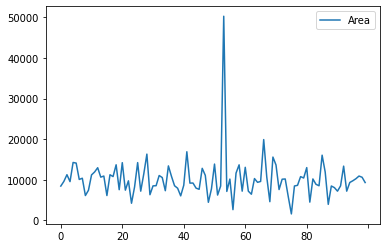

In [46]:
simple_data[['Area']][:100].plot()

array([[<AxesSubplot:title={'center':'Area'}>]], dtype=object)

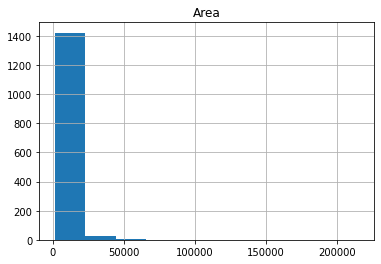

In [47]:
simple_data[['Area']].hist()

## Operations with `apply()`

Methods like `.sum()` and `.std()` work on entire columns. We can run our own functions across all values in a column (or row) using `.apply()`.

To get an idea about how this works, assume we want to convert the variable `Area` into squared meters instead of square foots. First, we create a conversion function.

In [48]:
def sfoot_to_smeter(x):
    return (x * 0.092903)

In [49]:
sfoot_to_smeter(1) #just checking everything is correct

0.092903

Using the `.apply()` method, which takes an [anonymous function](https://docs.python.org/2/reference/expressions.html#lambda), we can apply `sfoot_to_smeter` to each value in the column. We can now either overwrite the data in the column `Area` or create a new one. We'll do the latter in this case.

In [50]:
# Recall! data['Area'] is not a DataFrame, but a Pandas Series (another data object with different attributes). In order
# to index a DataFrame with a single column, you should use double [[]], i.e., data[['Area']]

data['Area_m2'] = data[['Area']].apply(lambda d: sfoot_to_smeter(d))

In [51]:
# Shortened if the only input parameter to the function is 
# the value in the datafrane column
data['Area_m2'] = data[['Area']].apply(sfoot_to_smeter)

Now, we do not even need the column `Area` (in square foot), let's remove it.

In [52]:
data.drop('Area',axis=1,inplace=True)
data.head(5) 

Id  MSSubClass MSZoning  LotFrontage Street Alley LotShape LandContour  \
0   1          60       RL         65.0   Pave   NaN      Reg         Lvl   
1   2          20       RL         80.0   Pave   NaN      Reg         Lvl   
2   3          60       RL         68.0   Pave   NaN      IR1         Lvl   
3   4          70       RL         60.0   Pave   NaN      IR1         Lvl   
4   5          60       RL         84.0   Pave   NaN      IR1         Lvl   

  Utilities LotConfig  ... Fence MiscFeature MiscVal MoSold YrSold SaleType  \
0    AllPub    Inside  ...   NaN         NaN       0      2   2008       WD   
1    AllPub       FR2  ...   NaN         NaN       0      5   2007       WD   
2    AllPub    Inside  ...   NaN         NaN       0      9   2008       WD   
3    AllPub    Corner  ...   NaN         NaN       0      2   2006       WD   
4    AllPub       FR2  ...   NaN         NaN       0     12   2008       WD   

   SaleCondition  SalePrice         Exterior     Area_m2  
0         Normal     208500  VinylSd-VinylSd   785.03035  
1         Normal     181500  MetalSd-MetalSd   891.86880  
2         Normal     223500  VinylSd-VinylSd  1045.15875  
3        Abnorml     140000  Wd Sdng-Wd Shng   887.22365  
4         Normal     250000  VinylSd-VinylSd  1324.79678  

[5 rows x 82 columns]

## Indexing: `.iloc`, `.loc`

There are [multiple ways](http://pandas.pydata.org/pandas-docs/stable/indexing.html#different-choices-for-indexing) to select and index rows and columns from Pandas DataFrames. 

There’s three main options to achieve the selection and indexing activities in Pandas, which can be confusing. The three selection cases and methods covered in this post are:

- Selecting data by row/column numbers (`.iloc`)
- Selecting data by index/label or by a conditional statment (`.loc`)
- Selecting in a hybrid approach (`.ix`) (now Deprecated in Pandas 0.20.1)

We will review here the first two

### Selecting rows/columns using `.iloc()`

The [`.iloc`](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.iloc.html) indexer for Pandas Dataframe is used for integer-location based indexing / selection by position.

The iloc indexer syntax is `data.iloc[<row selection>, <column selection>]`. `.iloc` in pandas is used to select rows and columns by number, **in the order that they appear in the data frame**. You can imagine that each row has a row number from 0 to the total rows (`data.shape[0]`)  and `.iloc[]` allows selections based on these numbers. The same applies for columns (ranging from 0 to `data.shape[1]`)

In [53]:
simple_data.iloc[[3,4],0:3]

Area  1stFlrSF  2ndFlrSF
3   9550       961       756
4  14260      1145      1053

Note that `.iloc` returns a Pandas Series when one column is selected, and a Pandas DataFrame when multiple columns are selected. To counter this, pass a single-valued list if you require DataFrame output. 

In [54]:
print(type(simple_data.iloc[:,0]))  #PandaSeries


print(type(simple_data.iloc[:,[0]])) #DataFrame

# To avoid confusion, work always with DataFrames!

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


When selecting multiple columns or multiple rows in this manner, remember that in your selection e.g. `[1:5]`, the rows/columns selected will run from the first number to one minus the second number. e.g. `[1:5]` will go 1,2,3,4., `[x:y]` goes from x to y-1.


In practice, `.iloc()` is sheldom used. `.loc()` is way more handly.

### Selecting rows/columns using `.loc()`

The Pandas `.loc()` indexer can be used with DataFrames for two different use cases:

- Selecting rows/columns by index/label
- Selecting rows/columns with a boolean/conditional lookup

#### Selecting rows by index/label

*Important*: Selections using the `.loc()` method are based on the index of the data frame (if any). Where the index is set on a DataFrame, using <code>df.set_index()</code>, the `.loc()` method directly selects based on index values of any rows. For example, setting the index of our test data frame to the column `OverallQual` (Rates the overall material and finish of the house):

In [55]:
data.set_index('OverallQual',inplace=True)

In [56]:
data.head(5) 

Id  MSSubClass MSZoning  LotFrontage Street Alley LotShape  \
OverallQual                                                               
7             1          60       RL         65.0   Pave   NaN      Reg   
6             2          20       RL         80.0   Pave   NaN      Reg   
7             3          60       RL         68.0   Pave   NaN      IR1   
7             4          70       RL         60.0   Pave   NaN      IR1   
8             5          60       RL         84.0   Pave   NaN      IR1   

            LandContour Utilities LotConfig  ... Fence MiscFeature MiscVal  \
OverallQual                                  ...                             
7                   Lvl    AllPub    Inside  ...   NaN         NaN       0   
6                   Lvl    AllPub       FR2  ...   NaN         NaN       0   
7                   Lvl    AllPub    Inside  ...   NaN         NaN       0   
7                   Lvl    AllPub    Corner  ...   NaN         NaN       0   
8                   Lvl    AllPub       FR2  ...   NaN         NaN       0   

            MoSold YrSold SaleType  SaleCondition  SalePrice         Exterior  \
OverallQual                                                                     
7                2   2008       WD         Normal     208500  VinylSd-VinylSd   
6                5   2007       WD         Normal     181500  MetalSd-MetalSd   
7                9   2008       WD         Normal     223500  VinylSd-VinylSd   
7                2   2006       WD        Abnorml     140000  Wd Sdng-Wd Shng   
8               12   2008       WD         Normal     250000  VinylSd-VinylSd   

                Area_m2  
OverallQual              
7             785.03035  
6             891.86880  
7            1045.15875  
7             887.22365  
8            1324.79678  

[5 rows x 81 columns]

Using `.loc()` we can search for rows with a specific index value

In [57]:
good_houses = data.loc[[8,9,10]]  #List all houses with rating above 8

good_houses.head(10)

Id  MSSubClass MSZoning  LotFrontage Street Alley LotShape  \
OverallQual                                                               
8             5          60       RL         84.0   Pave   NaN      IR1   
8             7          20       RL         75.0   Pave   NaN      Reg   
8            21          60       RL        101.0   Pave   NaN      IR1   
8            23          20       RL         75.0   Pave   NaN      Reg   
8            26          20       RL        110.0   Pave   NaN      Reg   
8            28          20       RL         98.0   Pave   NaN      Reg   
8            33          20       RL         85.0   Pave   NaN      Reg   
8            36          60       RL        108.0   Pave   NaN      Reg   
8            48          20       FV         84.0   Pave   NaN      Reg   
8            57         160       FV         24.0   Pave  Pave      Reg   

            LandContour Utilities LotConfig  ... Fence MiscFeature MiscVal  \
OverallQual                                  ...                             
8                   Lvl    AllPub       FR2  ...   NaN         NaN       0   
8                   Lvl    AllPub    Inside  ...   NaN         NaN       0   
8                   Lvl    AllPub    Corner  ...   NaN         NaN       0   
8                   Lvl    AllPub    Inside  ...   NaN         NaN       0   
8                   Lvl    AllPub    Corner  ...   NaN         NaN       0   
8                   Lvl    AllPub    Inside  ...   NaN         NaN       0   
8                   Lvl    AllPub    Corner  ...   NaN         NaN       0   
8                   Lvl    AllPub    Inside  ...   NaN         NaN       0   
8                   Lvl    AllPub    Inside  ...   NaN         NaN       0   
8                   Lvl    AllPub    Inside  ...   NaN         NaN       0   

            MoSold YrSold SaleType  SaleCondition  SalePrice         Exterior  \
OverallQual                                                                     
8               12   2008       WD         Normal     250000  VinylSd-VinylSd   
8                8   2007       WD         Normal     307000  VinylSd-VinylSd   
8               11   2006      New        Partial     325300  VinylSd-VinylSd   
8                9   2008       WD         Normal     230000  VinylSd-VinylSd   
8                7   2009       WD         Normal     256300  VinylSd-VinylSd   
8                5   2010       WD         Normal     306000  VinylSd-VinylSd   
8                1   2008       WD         Normal     179900  VinylSd-VinylSd   
8                9   2006       WD         Normal     309000  VinylSd-VinylSd   
8                7   2007       WD         Normal     249700  VinylSd-VinylSd   
8                8   2009       WD        Abnorml     172500  MetalSd-MetalSd   

                 Area_m2  
OverallQual               
8            1324.796780  
8             936.833852  
8            1320.616145  
8             905.061026  
8            1322.009690  
8            1066.340634  
8            1026.485247  
8            1246.572454  
8            1030.851688  
8             245.728435  

[10 rows x 81 columns]

We can combine row and column selection

In [58]:
good_houses_col = data.loc[[8,9,10],['MSSubClass', 'MSZoning']]  #List all houses with rating above 8 and the columns MSSubClass and MSZoning

good_houses_col.head(10)

MSSubClass MSZoning
OverallQual                     
8                    60       RL
8                    20       RL
8                    60       RL
8                    20       RL
8                    20       RL
8                    20       RL
8                    20       RL
8                    60       RL
8                    20       FV
8                   160       FV

We can sort the dataframe according to index

In [59]:
data.sort_index(inplace=True,ascending=False) # I sort data
good_houses.head(10) # The result can be checked in good_houses since it is a copy of data

Id  MSSubClass MSZoning  LotFrontage Street Alley LotShape  \
OverallQual                                                               
8             5          60       RL         84.0   Pave   NaN      IR1   
8             7          20       RL         75.0   Pave   NaN      Reg   
8            21          60       RL        101.0   Pave   NaN      IR1   
8            23          20       RL         75.0   Pave   NaN      Reg   
8            26          20       RL        110.0   Pave   NaN      Reg   
8            28          20       RL         98.0   Pave   NaN      Reg   
8            33          20       RL         85.0   Pave   NaN      Reg   
8            36          60       RL        108.0   Pave   NaN      Reg   
8            48          20       FV         84.0   Pave   NaN      Reg   
8            57         160       FV         24.0   Pave  Pave      Reg   

            LandContour Utilities LotConfig  ... Fence MiscFeature MiscVal  \
OverallQual                                  ...                             
8                   Lvl    AllPub       FR2  ...   NaN         NaN       0   
8                   Lvl    AllPub    Inside  ...   NaN         NaN       0   
8                   Lvl    AllPub    Corner  ...   NaN         NaN       0   
8                   Lvl    AllPub    Inside  ...   NaN         NaN       0   
8                   Lvl    AllPub    Corner  ...   NaN         NaN       0   
8                   Lvl    AllPub    Inside  ...   NaN         NaN       0   
8                   Lvl    AllPub    Corner  ...   NaN         NaN       0   
8                   Lvl    AllPub    Inside  ...   NaN         NaN       0   
8                   Lvl    AllPub    Inside  ...   NaN         NaN       0   
8                   Lvl    AllPub    Inside  ...   NaN         NaN       0   

            MoSold YrSold SaleType  SaleCondition  SalePrice         Exterior  \
OverallQual                                                                     
8               12   2008       WD         Normal     250000  VinylSd-VinylSd   
8                8   2007       WD         Normal     307000  VinylSd-VinylSd   
8               11   2006      New        Partial     325300  VinylSd-VinylSd   
8                9   2008       WD         Normal     230000  VinylSd-VinylSd   
8                7   2009       WD         Normal     256300  VinylSd-VinylSd   
8                5   2010       WD         Normal     306000  VinylSd-VinylSd   
8                1   2008       WD         Normal     179900  VinylSd-VinylSd   
8                9   2006       WD         Normal     309000  VinylSd-VinylSd   
8                7   2007       WD         Normal     249700  VinylSd-VinylSd   
8                8   2009       WD        Abnorml     172500  MetalSd-MetalSd   

                 Area_m2  
OverallQual               
8            1324.796780  
8             936.833852  
8            1320.616145  
8             905.061026  
8            1322.009690  
8            1066.340634  
8            1026.485247  
8            1246.572454  
8            1030.851688  
8             245.728435  

[10 rows x 81 columns]

### Boolean / Logical indexing using `.loc`

[Conditional selections](http://pandas.pydata.org/pandas-docs/stable/indexing.html#boolean-indexing) with boolean arrays using `data.loc[<selection>]` is a common method with Pandas DataFrames. With boolean indexing or logical selection, you pass an array or Series of `True/False` values to the `.loc` indexer to select the rows where your Series has `True` values.

For example, the statement `data[‘first_name’] == ‘Antonio’]` produces a Pandas Series with a `True/False` value for every row in the `data` DataFrame, where there are `True` values for the rows where the first_name is `Antonio`. These type of boolean arrays can be passed directly to the `.loc` indexer as so:

In [60]:
good_houses.loc[good_houses['PoolArea']>0] #How many houses with quality above or equal to 8 have a Pool

Id  MSSubClass MSZoning  LotFrontage Street Alley LotShape  \
OverallQual                                                                 
8             198          75       RL        174.0   Pave   NaN      Reg   
10           1183          60       RL        160.0   Pave   NaN      IR1   
10           1299          60       RL        313.0   Pave   NaN      IR3   

            LandContour Utilities LotConfig  ...  Fence MiscFeature MiscVal  \
OverallQual                                  ...                              
8                   Lvl    AllPub    Corner  ...  GdPrv         NaN       0   
10                  Lvl    AllPub    Corner  ...  MnPrv         NaN       0   
10                  Bnk    AllPub    Corner  ...    NaN         NaN       0   

            MoSold YrSold SaleType  SaleCondition  SalePrice         Exterior  \
OverallQual                                                                     
8                3   2006       WD        Abnorml     235000    Stucco-Stucco   
10               7   2007       WD        Abnorml     745000  Wd Sdng-ImStucc   
10               1   2008      New        Partial     160000    Stucco-Stucco   

                 Area_m2  
OverallQual               
8            2361.501357  
10           1451.423569  
10           5935.293961  

[3 rows x 81 columns]

As before, a second argument can be passed to `.loc` to select particular columns out of the data frame.

In [61]:
good_houses.loc[good_houses['PoolArea']>0,['GarageArea','GarageCars']] #Among those above, we focus on the area of the
# garage and how many cars can fit within

GarageArea  GarageCars
OverallQual                        
8                   795           2
10                  813           3
10                 1418           2

Even an anonymous function with the `.apply()` method can be used to generate the series of `True/False` indexes. For instance, select good houses with less than 10 years.

In [62]:
def check_date(current_year,year_built,threshold):
    
    return (current_year-year_built) <= threshold

In [63]:
good_houses.loc[good_houses['YearBuilt'].apply(lambda d: check_date(2018, d,10))]

Id  MSSubClass MSZoning  LotFrontage Street Alley LotShape  \
OverallQual                                                                 
8             158          60       RL         92.0   Pave   NaN      Reg   
8             241          20       FV         75.0   Pave   NaN      Reg   
8             284          20       RL         74.0   Pave   NaN      Reg   
8             454          60       FV         75.0   Pave   NaN      Reg   
8             461          60       FV         75.0   Pave   NaN      IR1   
8             582          20       RL         98.0   Pave   NaN      Reg   
8             679          20       RL         80.0   Pave   NaN      IR1   
8            1167          20       RL         64.0   Pave   NaN      IR1   
8            1182         120       RM         64.0   Pave   NaN      IR1   
8            1218          20       FV         72.0   Pave   NaN      Reg   
8            1317          20       RL         61.0   Pave   NaN      IR1   
8            1438          20       RL         96.0   Pave   NaN      Reg   
8            1452          20       RL         78.0   Pave   NaN      Reg   
9             179          20       RL         63.0   Pave   NaN      IR1   
9             379          20       RL         88.0   Pave   NaN      Reg   
9             528          60       RL         67.0   Pave   NaN      IR1   
9             645          20       FV         85.0   Pave   NaN      Reg   
9             766          20       RL         75.0   Pave   NaN      IR1   
9             799          60       RL        104.0   Pave   NaN      Reg   
9             804          60       RL        107.0   Pave   NaN      Reg   
9             899          20       RL        100.0   Pave   NaN      IR1   
9             988          20       RL         83.0   Pave   NaN      IR1   
9            1059          60       RL         96.0   Pave   NaN      IR1   
9            1229         120       RL         65.0   Pave   NaN      Reg   
9            1268          20       RL         89.0   Pave   NaN      IR1   
10            441          20       RL        105.0   Pave   NaN      Reg   
10            516          20       RL         94.0   Pave   NaN      Reg   
10            592          60       RL         97.0   Pave   NaN      IR1   
10           1299          60       RL        313.0   Pave   NaN      IR3   
10           1443          60       FV         85.0   Pave   NaN      Reg   

            LandContour Utilities LotConfig  ... Fence MiscFeature MiscVal  \
OverallQual                                  ...                             
8                   Lvl    AllPub    Corner  ...   NaN         NaN       0   
8                   Lvl    AllPub    Inside  ...   NaN         NaN       0   
8                   Lvl    AllPub    Inside  ...   NaN         NaN       0   
8                   Lvl    AllPub    Inside  ...   NaN         NaN       0   
8                   Lvl    AllPub    Inside  ...   NaN         NaN       0   
8                   Lvl    AllPub    Inside  ...   NaN         NaN       0   
8                   Lvl    AllPub    Inside  ...   NaN         NaN       0   
8                   Lvl    AllPub    Corner  ...   NaN         NaN       0   
8                   HLS    AllPub    Inside  ...   NaN         NaN       0   
8                   Lvl    AllPub    Inside  ...   NaN         NaN       0   
8                   Lvl    AllPub    Inside  ...   NaN         NaN       0   
8                   Lvl    AllPub       FR2  ...   NaN         NaN       0   
8                   Lvl    AllPub    Inside  ...   NaN         NaN       0   
9                   Lvl    AllPub   CulDSac  ...   NaN         NaN       0   
9                   Lvl    AllPub    Corner  ...   NaN         NaN       0   
9                   Lvl    AllPub    Inside  ...   NaN         NaN       0   
9                   Lvl    AllPub    Inside  ...   NaN         NaN       0   
9                   Lvl    AllPub    Inside  ...   NaN         NaN  

Using the above filtering, we can add our own column to the DataFrame to create an index that is 1 for houses that have swimming pool and less than 30 years.

In [64]:
data['My_index'] = 0 # We create new column with default vale

data.loc[(data['YearBuilt'].apply(lambda d: check_date(2018, d,30))) & (data['PoolArea']>0),'My_index'] = 1

data.loc[data['My_index'] == 1]

Id  MSSubClass MSZoning  LotFrontage Street Alley LotShape  \
OverallQual                                                                 
10           1183          60       RL        160.0   Pave   NaN      IR1   
10           1299          60       RL        313.0   Pave   NaN      IR3   

            LandContour Utilities LotConfig  ... MiscFeature MiscVal MoSold  \
OverallQual                                  ...                              
10                  Lvl    AllPub    Corner  ...         NaN       0      7   
10                  Bnk    AllPub    Corner  ...         NaN       0      1   

            YrSold SaleType SaleCondition  SalePrice         Exterior  \
OverallQual                                                             
10            2007       WD       Abnorml     745000  Wd Sdng-ImStucc   
10            2008      New       Partial     160000    Stucco-Stucco   

                 Area_m2 My_index  
OverallQual                        
10           1451.423569        1  
10           5935.293961        1  

[2 rows x 82 columns]

## Handling Missing Data

Pandas considers values like `NaN` and `None` to represent missing data. The `pandas.isnull` function can be used to tell whether or not a value is missing.

Let's use `apply()` across all of the columns in our DataFrame to figure out which values are missing.

Note: So far, we have applied `lambda` functions over Pandas Series, so we loop over the serie elements (rows from the original data frame). When we use `lambda` over a Pandas DataFrame, it iterates over the DataFrame columns.

In [65]:
empty = data.apply(lambda col: pd.isnull(col))

empty.head(5) #We get back a boolean Dataframe with 'True' whenever we have a missing data (either Nan or None)

Id  MSSubClass  MSZoning  LotFrontage  Street  Alley  \
OverallQual                                                            
10           False       False     False        False   False   True   
10           False       False     False        False   False   True   
10           False       False     False        False   False   True   
10           False       False     False        False   False   True   
10           False       False     False        False   False   True   

             LotShape  LandContour  Utilities  LotConfig  ...  MiscFeature  \
OverallQual                                               ...                
10              False        False      False      False  ...         True   
10              False        False      False      False  ...         True   
10              False        False      False      False  ...         True   
10              False        False      False      False  ...         True   
10              False        False      False      False  ...         True   

             MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  \
OverallQual                                                                
10             False   False   False     False          False      False   
10             False   False   False     False          False      False   
10             False   False   False     False          False      False   
10             False   False   False     False          False      False   
10             False   False   False     False          False      False   

             Exterior  Area_m2  My_index  
OverallQual                               
10              False    False     False  
10              False    False     False  
10              False    False     False  
10              False    False     False  
10              False    False     False  

[5 rows x 82 columns]

There are multiple ways of handling missing data. Pandas provides handly functions to easily work with missing data, check [this post](https://chrisalbon.com/python/data_wrangling/pandas_missing_data/) for examples, altough we will review this during next days.

## Getting data out

Writing data out in pandas is as easy as getting data in. To save our DataFrame out to a new csv file, we can just do this:

In [66]:
data.to_csv("modified_data.csv")

There's also support for reading and writing [Excel files](http://pandas.pydata.org/pandas-docs/stable/io.html#excel-files), if you need it.

Also, creating a Numpy array is straightforward:

In [67]:
import numpy as np

In [68]:
data_array = np.array(good_houses)

print(data_array.shape)

(229, 81)


If you want to go deeper into Pandas Dataframes, check out [DataCamp’s Pandas Tutorial on DataFrames in Python](https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python) or the [Pandas Foundations course](https://www.datacamp.com/courses/pandas-foundations).

# 3. Sparse data representation

Sparse matrices are commonly used in applied machine learning (such as in data containing data-encodings that map categories to count), in whole subfields of machine learning such as Natural Language Processing (NLP) or in some particular applications, such as, recommender systems.

Sparse matrices contain only a few non-zero values. Storing such data in a two-dimensional matrix data structure is a waste of space. Also, it is computationally expensive to represent and work with sparse matrices as though they are dense. A significant improvement in performance can be achieved by using representations and operations that specifically handle matrix sparsity.

**Python’s SciPy** provides tools for creating sparse matrices using multiple data structures, as well as tools for converting a dense matrix to a sparse matrix. The **sparse matrix representation** outputs the row-column tuple where the matrix contains non-zero values along with those values.

In this Section, we will learn the main functionalities of this library.

### Acknowledgment:

This section consists of a merge of some open tutorials about sparse matrix:
* https://www.educative.io/edpresso/sparse-matrices-in-python
* https://cmdlinetips.com/2018/03/sparse-matrices-in-python-with-scipy/



Matrices that contain mostly zero values are called **sparse**, distinct from matrices where most of the values are non-zero, called **dense**. The following code shows an example of both types of data representations



In [69]:
import numpy as np
from scipy.sparse import csr_matrix

# create a 2-D representation of the matrix
A = np.array([[1, 0, 0, 0, 0, 0], [0, 0, 2, 0, 0, 1],\
 [0, 0, 0, 2, 0, 0]])
print("Dense matrix representation: \n", A)

# convert to sparse matrix representation 
S = csr_matrix(A)
print("Sparse matrix: \n",S)

# convert back to 2-D representation of the matrix
B = S.todense()
print("Dense matrix: \n", B)

Dense matrix representation: 
 [[1 0 0 0 0 0]
 [0 0 2 0 0 1]
 [0 0 0 2 0 0]]
Sparse matrix: 
   (0, 0)	1
  (1, 2)	2
  (1, 5)	1
  (2, 3)	2
Dense matrix: 
 [[1 0 0 0 0 0]
 [0 0 2 0 0 1]
 [0 0 0 2 0 0]]


As we can see, sparse matrices are memory efficient data structures that enable us store large matrices with very few non-zero elements, aka, sparse matrices. 

In addition to efficient storage, sparse matrix data structure also allows us to perform complex matrix computations. The ability to do such computations is incredibly powerful in a variety of data science problems. Learning to work with Sparse matrix, a large matrix or 2d-array with a lot elements being zero, can be extremely handy.

Python’s SciPy library has a lot of options for creating, storing, and operating with Sparse matrices. There are 7 different types of sparse matrices available, but the most common are:
*  **coo_matrix**: COOrdinate format matrix
*  **csc_matrix**: Compressed Sparse Column matrix
*  **csr_matrix**: Compressed Sparse Row matrix

Other data types are **dok_matrix** where a dictionary maps from a row and column index to a data value, or  **lil_matrix** (list of lists where each row of the matrix is stored as a list and each sublist contains the column index and the value). You can find [here](https://docs.scipy.org/doc/scipy/reference/sparse.html) a full description of these data types.

Now, we will see a few simple examples of creating sparse matrix and using them in Python using SciPy’s sparse module.



### Create a sparse matrix: COO matrix format

One of the more intuitive matrix format is COOordinate sparse one. One can create COO sparse matrix fast. We basically need the coordinates of non-zero elements in the sparse matrix.

To create a coo_matrix we need 3 one-dimensional numpy arrays. The first array represents the row indices, the second array represents column indices and the third array represents non-zero data in the element. The row and column indices specify the location of non-zero element and the data array specifies the actual non-zero data in it.

Let us create a sparse matrix in COO format using simple example. Let us first create 3 numpy arrays needed to create COO sparse matrix.

In [70]:
# row indices
row_ind = np.array([0, 1, 1, 3, 4])
# column indices
col_ind = np.array([0, 2, 4, 3, 4])
# data to be stored in COO sparse matrix
data = np.array([1, 2, -3, 4, 5], dtype=float)

We can use `sparse.coo_matrix` to create sparse matrix in COO format. It takes data and the row and column index tuple as arguments.

In [71]:
from scipy import sparse
# create COO sparse matrix from three arrays
mat_coo = sparse.coo_matrix((data, (row_ind, col_ind)))
# print coo_matrix
print(mat_coo)

  (0, 0)	1.0
  (1, 2)	2.0
  (1, 4)	-3.0
  (3, 3)	4.0
  (4, 4)	5.0


The sparse data matrix has some data attributes

In [72]:
# Get shape of a matrix.
print(mat_coo.shape)
# Get the number of stored values
print(mat_coo.nnz)

(5, 5)
5


With this information, we can compute the sparsity rate of the matrix, i.e., the number of zero values in the matrix divided by the total number of elements in the matrix

In [73]:
TotalElements = mat_coo.shape[0]*mat_coo.shape[1]
SR = (TotalElements - mat_coo.nnz) / TotalElements
print(SR)

0.8


In [74]:
# Get the data array of the matrix
print(mat_coo.data)
# Get the row index array of the matrix
print(mat_coo.row)
# Get the column index array of the matrix
print(mat_coo.col)

[1.000 2.000 -3.000 4.000 5.000]
[0 1 1 3 4]
[0 2 4 3 4]


Besides, they have lots of useful functions similar to numpy arrays. For instance:

In [75]:
#Get the kth diagonal of the matrix.
print(mat_coo.diagonal(0))
print(mat_coo.diagonal(1))

[1.000 0.000 0.000 4.000 5.000]
[0.000 2.000 0.000 0.000]


In [76]:
# Compute the transpose
print(mat_coo.transpose())

  (0, 0)	1.0
  (2, 1)	2.0
  (4, 1)	-3.0
  (3, 3)	4.0
  (4, 4)	5.0


In [77]:
# Dot product of matrix
print(mat_coo.dot(mat_coo.transpose()))

  (0, 0)	1.0
  (1, 4)	-15.0
  (1, 1)	13.0
  (3, 3)	16.0
  (4, 4)	25.0
  (4, 1)	-15.0


In [78]:
# Maximum/minimum value over a given axis
print('Maximum value')
print(mat_coo.max(axis=0))
print('Minimum value')
print(mat_coo.min(axis=0))
# Mean value
print('Mean value')
print(mat_coo.mean(axis=0))

Maximum value
  (0, 0)	1.0
  (0, 2)	2.0
  (0, 3)	4.0
  (0, 4)	5.0
Minimum value
  (0, 4)	-3.0
Mean value
[[0.200 0.000 0.400 0.800 0.400]]


Analyze these last results and answer these questions:
* Which data format is returning each operation and why?
* Why does the minimum operator return a single value?

Scipy also includes function to convert coo_matrix to other sparse matrices

In [79]:
# Convert COO format to CSC
print(mat_coo.tocsc())

  (0, 0)	1.0
  (1, 2)	2.0
  (3, 3)	4.0
  (1, 4)	-3.0
  (4, 4)	5.0


In [80]:
# Convert COO format to CSR
print(mat_coo.tocsr())

  (0, 0)	1.0
  (1, 2)	2.0
  (1, 4)	-3.0
  (3, 3)	4.0
  (4, 4)	5.0


Note the order of data stored in CSC/CSR format is different from COO sparse matrix, since CSC/CSR has the element sorted by columns/rows, to facilitate column/row-wise operations.

Finally, it also includes function to convert sparse matrices to dense format.

In [81]:
# Convert sparse matrix to dense
print(mat_coo.toarray())

[[1.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 2.000 0.000 -3.000]
 [0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 4.000 0.000]
 [0.000 0.000 0.000 0.000 5.000]]


In [82]:
# Convert sparse matrix to dense
print(mat_coo.todense())

[[1.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 2.000 0.000 -3.000]
 [0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 4.000 0.000]
 [0.000 0.000 0.000 0.000 5.000]]


Note: `.toarray()` returns an ndarray, whereas `.todense()` returns a matrix.

### Create sparse matrix from a dense (full) matrix

In the above example of creating COO matrix we had our data in nice format and, thus, we could use it create COO sparse matrix. Often, we start with a full matrix as input. Here is an example showing how to use existing 2d-array/matrix to create a sparse matrix.

This time we will create CSR matrix sparse matrix. And we will also create the full matrix using random numbers from uniform distribution in SciPy.stats.

Let us first set a seed for random number generation, so that we can reproduce the same random numbers. We will use SciPy.stats module to create a toy sparse matrix with just 4 rows and 4 columns.

We will first create uniform random numbers from 0 to 2 in a 1d-numpy array. And then use reshape function to make it a 2d-numpy array i.e. a matrix.

In [83]:
from scipy.stats import uniform
np.random.seed(seed=42)
data = uniform.rvs(size=16, loc = 0, scale=2)
data = np.reshape(data, (4, 4))
data

array([[0.749, 1.901, 1.464, 1.197],
       [0.312, 0.312, 0.116, 1.732],
       [1.202, 1.416, 0.041, 1.940],
       [1.665, 0.425, 0.364, 0.367]])

We can see that we have created 4×4 2d-array with uniform random numbers.

Let us convert this full matrix into a sparse matrix. Let us first make some of the elements of matrix zero. Here any element with values less than 1 will be assigned to 0. Now half the elements of this matrix are zero.

In [84]:
# make elements with value less < 1 to zero 
data[data < 1] = 0 
data

array([[0.000, 1.901, 1.464, 1.197],
       [0.000, 0.000, 0.000, 1.732],
       [1.202, 1.416, 0.000, 1.940],
       [1.665, 0.000, 0.000, 0.000]])

Let us convert this full matrix with zeros to sparse matrix using sparse module in SciPy. As you just saw, SciPy has multiple options for sparse matrices. We will be using CSR matrix, where CSR stands for Compressed Sparse Row.

In [85]:
data_csr = sparse.csr_matrix(data)
print(data_csr)

  (0, 1)	1.9014286128198323
  (0, 2)	1.4639878836228102
  (0, 3)	1.1973169683940732
  (1, 3)	1.7323522915498704
  (2, 0)	1.2022300234864176
  (2, 1)	1.416145155592091
  (2, 3)	1.9398197043239886
  (3, 0)	1.6648852816008435


We can see that in the CSR sparse matrix, we have only nonzero elements. Also the elements are stored row wise, leaving any zero element. The toy example showed how to create sparse matrix from a full matrix in Python.

How much space do we gain by storing a big sparse matrix in SciPy.sparse?

One of the real uses of sparse matrix is the huge space reduction to store sparse matrices. Let us create a bigger full matrix using uniform random numbers.

In [86]:
np.random.seed(seed=42)
data = uniform.rvs(size=1000000, loc = 0, scale=2)
data = np.reshape(data, (10000, 100))

Let us make the matrix sparse by making certain elements zero. As before, we make any element whose value is less than 1 to 0. We can use nbytes function in NumPy to get the number of bytes and get the size of the matrix in MB.

In [87]:
data[data < 1] = 0 
data_size = data.nbytes/(1024**2)
print('Size of full matrix with zeros: '+ '%3.2f' %data_size + ' MB')

Size of full matrix with zeros: 7.63 MB


We can see the size of full matrix of size 1 million elements with half of them with values zero is about 8 MB.

In [88]:
data_csr = sparse.csr_matrix(data)
data_csr_size = data_csr.data.size/(1024**2)
print('Size of sparse csr_matrix: '+ '%3.2f' %data_csr_size + ' MB')


Size of sparse csr_matrix: 0.48 MB


With the use of sparse matrix, the size of the data in the sparse matrix is just about 7MB, a huge reduction is space. This is mainly due efficient data structure to store only the non-zero elements.

### Other methods to create a sparse matrix

The Sparse Scipy package also includes some functions to directly create sparse matrix. For instance:
* **`rand()`** generates a sparse matrix of the given shape and density with uniformly distributed values.
* **`identity()`** generates a identity matrix in sparse format.
* **`eye()`** generates a sparse matrix with ones on diagonal.

In [89]:
print(sparse.rand(10, 10, 0.1))


  (4, 0)	0.8131468341343352
  (3, 2)	0.4715542826701673
  (2, 8)	0.34797004520318275
  (9, 0)	0.5967277339216505
  (3, 0)	0.3608261692841199
  (0, 4)	0.31701875357501363
  (8, 9)	0.9704026614733304
  (6, 7)	0.970860752873414
  (8, 0)	0.7259910369178917
  (6, 5)	0.927372443949148


In [90]:
print(sparse.identity(10))

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0
  (4, 4)	1.0
  (5, 5)	1.0
  (6, 6)	1.0
  (7, 7)	1.0
  (8, 8)	1.0
  (9, 9)	1.0


In [91]:
print(sparse.eye(10,10,1))

  (0, 1)	1.0
  (1, 2)	1.0
  (2, 3)	1.0
  (3, 4)	1.0
  (4, 5)	1.0
  (5, 6)	1.0
  (6, 7)	1.0
  (7, 8)	1.0
  (8, 9)	1.0


### How to choose the right sparse data representation?

Each of these sparse matrix are efficient and fast for specific operations. For example, if you want to construct a new sparse matrix from scratch `lil_matrix` or `dok_matrix` are efficient. However, arithmetic operations on matrices are not efficient. `coo_matrix` has similar properties; good for creating sparse matrix, but bad for operations.

If you are interested in matrix operations, like multiplication or inversion either CSC or CSR sparse matrix format is more suitable/efficient. Due to the nature of the data structure, `csc_matrix` has faster/efficient column slicing, while `csr_matrix` has faster row slicing.


Choosing the right sparse matrix depends on the application. Typically, you may have to use multiple sparse matrix formats to get the job done. SciPy’s sparse module has really nice functions to convert one sparse matrix type to another.

# 4. Matplotlib

---
One of the best but also more challenging ways to get your insights across is to visualize the data: that way, you can more easily identify patterns, grasp difficult concepts or draw the attention to key elements.


[Matplotlib](https://matplotlib.org/) is a Python 2D plotting library which produces figures in a variety of formats. Matplotlib can be used in Python scripts, the Python and IPython shells, the Jupyter notebook, and web application servers.

Matplotlib tries to make easy things easy and hard things possible. You can generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc., with just a few lines of code. For examples, see the sample plots and thumbnail gallery.

For simple plotting the pyplot module provides a MATLAB-like interface, particularly when combined with IPython. For the power user, you have full control of line styles, font properties, axes properties, etc, via an object oriented interface or via a set of functions familiar to MATLAB users.


In [92]:
import matplotlib.pyplot as plt
#The following is required to print the plots inside the notebooks
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' #High quality figures

###  Data generation

In Python, random samples can be easily generated with the `numpy.random` package. Inside it we can find many useful tools to sample from the most important probability distributions.

We have common number generator functions:
* `rand()`: uniformly generates random samples.
* `randn()`: returns samples from the “standard normal” distribution.

Or more specific ones:
* `exponential([scale, size])`: draw samples from an exponential distribution with a given scale parameter.
* `normal([loc, scale, size])`:	draw random samples from a normal (Gaussian) distribution with parameters: `loc` (mean) and `scale` (standard deviation).
* `uniform([low, high, size])`: draw samples from a uniform distribution in the range low-high.

In the following examples we will look at different random generation methods and we will visualize the results. For the time being, you can ignore the visualization code. Later on we will learn how these visualization tools work.



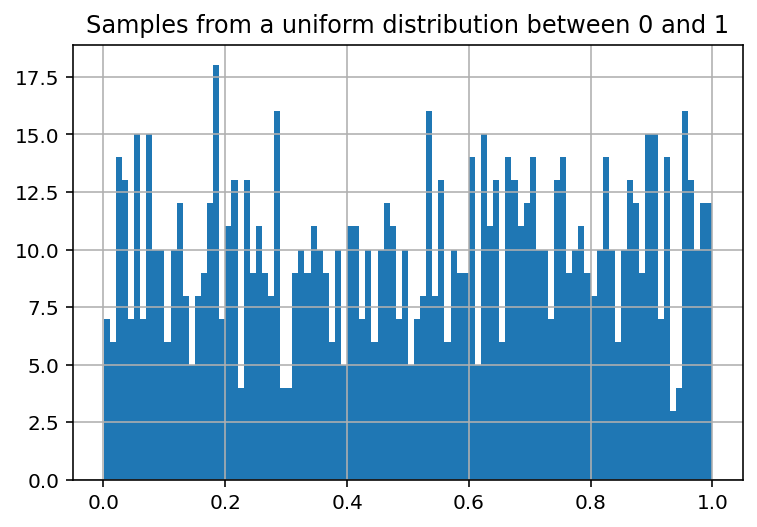

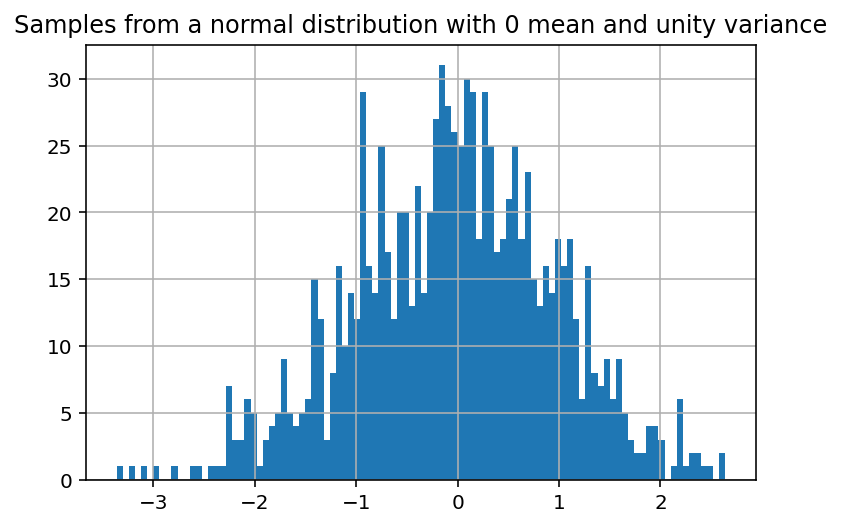

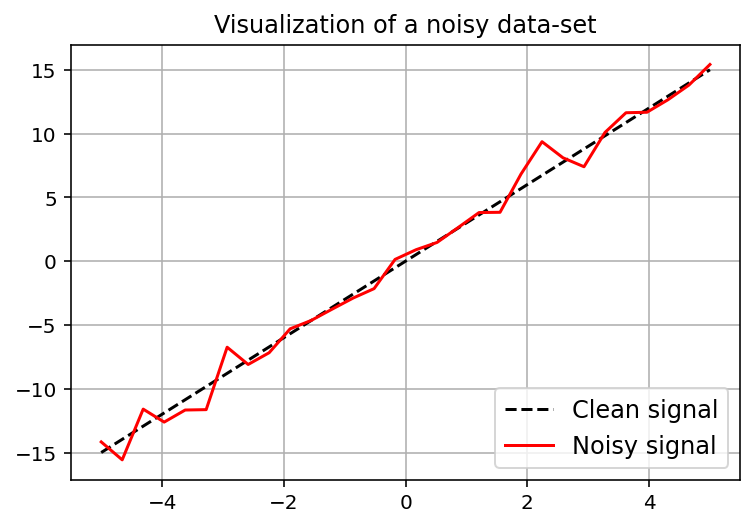

In [93]:
# Random samplig examples
n = 1000 # number of samples

# Sampling from a standard uniform distribution:
x_unif = np.random.rand(n)

fig1 = plt.figure()
plt.hist(x_unif, bins=100)
plt.title('Samples from a uniform distribution between 0 and 1')
plt.grid()
plt.show()

# Sampling from a normal distribution:
x_norm = np.random.randn(n)

fig2 = plt.figure()
plt.hist(x_norm, bins=100)
plt.title('Samples from a normal distribution with 0 mean and unity variance')
plt.grid()
plt.show()

# Adding Gaussian noise to a linear function:
n = 30
x = np.linspace(-5, 5, n)
noise = np.random.randn(n)
y = 3*x
y_noise = y + noise

fig3 = plt.figure()
plt.plot(x, y, color='black', linestyle='--', label='Clean signal')
plt.plot(x, y_noise, color='red', label='Noisy signal')
plt.legend(loc=4, fontsize='large')
plt.title('Visualization of a noisy data-set')
plt.grid()
plt.show()

More about plotting with `matplotlib`

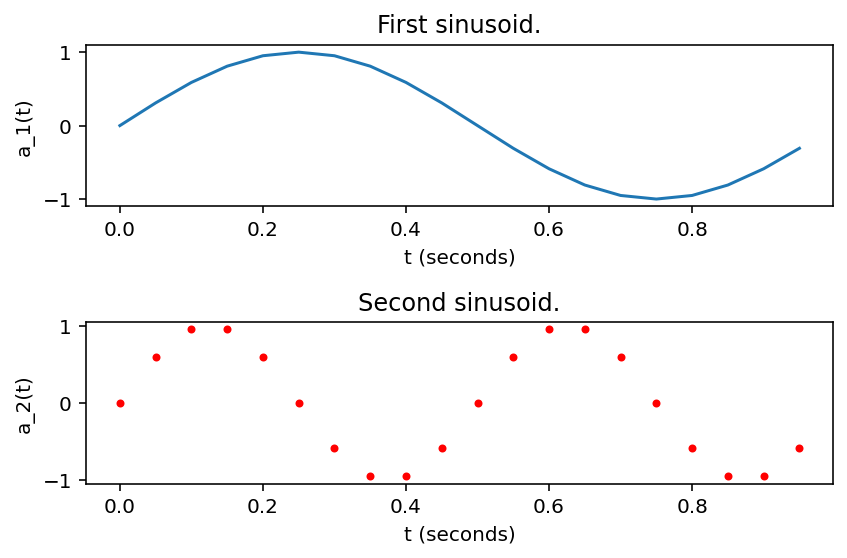

In [94]:
t = np.arange(0.0, 1.0, 0.05) # Time vector, from 0s to 1s in steps of 0.05s.
a1 = np.sin(2*np.pi*t) # Samples of the first signal.
a2 = np.sin(4*np.pi*t) # Samples of the second signal.

# Visualization

# We can create a figure that will contain our plots.
plt.figure()
# We can plot the two signals in different subplots, as in Matlab.

# First signal
ax1 = plt.subplot(211)
ax1.plot(t,a1)
plt.title('First sinusoid.')
plt.xlabel('t (seconds)')
plt.ylabel('a_1(t)')

# Second signal
ax2 = plt.subplot(212)
ax2.plot(t,a2, 'r.')
plt.title('Second sinusoid.')
plt.xlabel('t (seconds)')
plt.ylabel('a_2(t)')

# We ensure the two plots won't overlap, and finally we show the results on the 
# screen.
plt.tight_layout()
plt.show()

Let's analyze how we have created the previous figures and in which things they differ:


*   A crucial aspect to consider is that **both curves represent a set of discrete samples** (the samples we've generated). While the second plot uses red dots to represent the data (specified through `'r.'`), the first one will draw the points using the standard blue line. As in Matlab, using lines to plot samples will interpolate them by default. If we don't want Matplotlib to do so, we can specify a different symbol, like dots, squares, etc...
*   We can label the axis and set titles, enhancing the way in which our data is presented. Moreover, we can improve the clarity of a figure by including or modifying the line width, colors, symbols, legends, and a big etcetera. 

Look at the following figure and try to catch which argument and/or piece of code is related with each feature. It's intuitive! You can modify the parameters and see what's the new outcome. 


<ipython-input-95-3803565bebc3>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,a1,'r--',LineWidth=2, label='Sinusoidal')


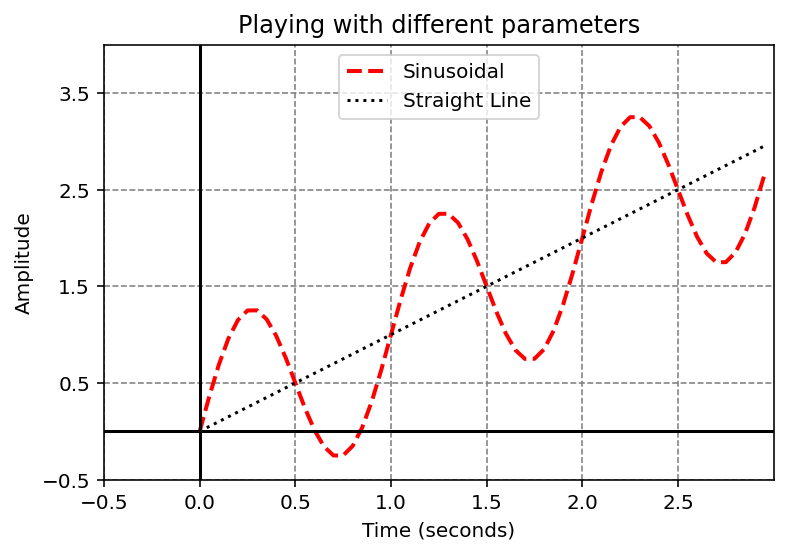

In [95]:
t = np.arange(0.0, 3, 0.05)
a1 = np.sin(2*np.pi*t)+t 
a2 = np.ones(a1.shape)*t

plt.figure()
# We are going to plot two signals in the same figure. For each one we can
# specify colors, symbols, width, and the label to be displayed in a legend.
# Use the Matplotlib docs if you want to know all the things you can do. 
plt.plot(t,a1,'r--',LineWidth=2, label='Sinusoidal') 
plt.plot(t,a2, 'k:', label='Straight Line')


plt.title('Playing with different parameters')
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')

# By default, axis limits will coincide with the highest/lowest values in our 
# vectors. However, we can specify ranges for x and y.
plt.xlim((-0.5, 3))
plt.ylim((-0.5, 4))

# When plotting more than one curve in a single figure, having a legend is a 
# good practice. You can ask Matplotlib to place it in the "best" position
# (trying not to overlap the lines), or you can specify positions like
# "upper left", "lower right"... check the docs!
plt.legend(loc='best')

# We can draw the origin lines, to separate the bidimensional space in four 
# quadrants.
plt.axhline(0,color='black')
plt.axvline(0, color='black')

# We can also set a grid with different styles... 
plt.grid(color='grey', linestyle='--', linewidth=0.8)

# And specify the "ticks", i.e., the values which are going to be specified in 
# the axis, where the grid method is placing lines. 
plt.xticks(np.arange(-0.5, 3, 0.5)) # In x, put a value each 0.5.
plt.yticks(np.arange(-0.5, 4, 1)) # In y, put a value each 1. 

# Finally, plot all the previous elements. 
plt.show()


In just a single example we have seen a lot of Matplotlib functionalities that can be easily tuned. You have all you need to draw decent figures. However, those of you who want to learn more about Matplotlib can take a look at [AnatomyOfMatplotlib](https://github.com/matplotlib/AnatomyOfMatplotlib), a collection of notebooks in which you will explore more in depth Matplotlib. 

### Histograms

Consider `x` a vector containing samples coming from a 1-dimensional random variable. A histogram is a figure in which we represent the observed frequencies of different ranges of the `x` domain. We can express them as relative frequencies (summing up to 1) or absolute frequencies (counting events). 

We can adapt the number and size of intervals (called bins) to directly affect the resolution of the plot. 

When we have a sufficiently high number of random samples coming from the same distribution, its histogram is expected to have a similar shape to the theoretical expression corresponding to the density of this distribution. 

In Matplotlib, we have already plotted histograms, with `plt.hist(samples,bins=)`.

Let's see some examples:

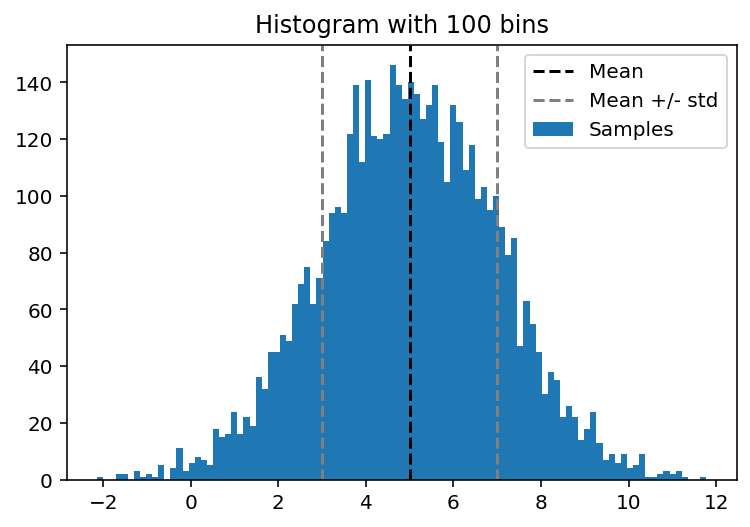

Sample mean =  5.002295750606247
Sample variance =  3.9968710158638103


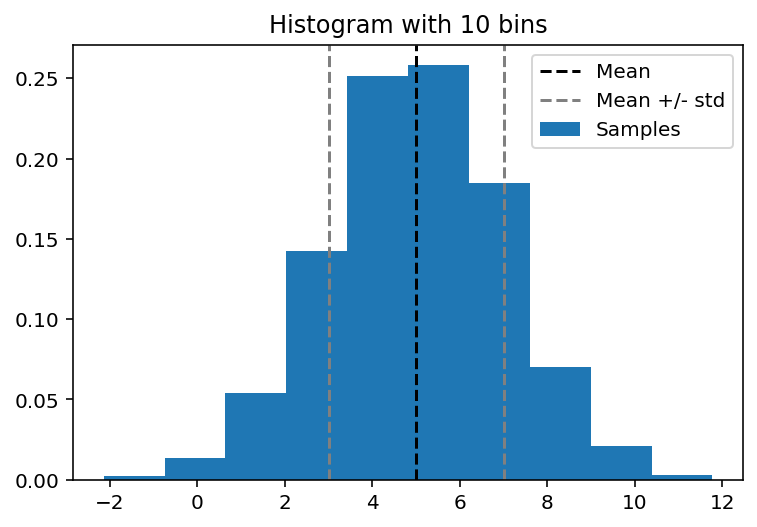

Sample mean =  5.002295750606247
Sample variance =  3.9968710158638103


In [96]:
# We take samples from a normalized gaussian distribution, and we change
# mean and variance with an operation.
sigma = 4
mn = 5
x_norm = mn + np.sqrt(sigma)*np.random.randn(5000)

# Let's obtain an histogram with high resultion, that is, a lot of bins.
fig1 = plt.figure()
plt.hist(x_norm, bins=100,label='Samples')
plt.title('Histogram with 100 bins')

# With vertical lines, we plot the mean and the intervals obtain summing one 
# standard deviation to the mean. 
plt.axvline(x=np.mean(x_norm),color='k',linestyle='--',label='Mean')
plt.axvline(x=np.mean(x_norm)+np.std(x_norm),color='grey',linestyle='--',label='Mean +/- std')
plt.axvline(x=np.mean(x_norm)-np.std(x_norm),color='grey',linestyle='--')


plt.legend(loc='best')
plt.show()

# We check that the mean and variance of the samples is aprox. the original one.
print('Sample mean = ', x_norm.mean())
print('Sample variance = ', x_norm.var())

# Now let's plot a low resolution histogram, with just a few bins.
fig2 = plt.figure()

# We can set weights in this way to obtain a normalized histogram, i.e.,
# expressing relative frequencies. 
w_n = np.zeros_like(x_norm) + 1. / x_norm.size

plt.hist(x_norm, bins=10,label='Samples',weights=w_n)
plt.title('Histogram with 10 bins')
plt.axvline(x=np.mean(x_norm),color='k',linestyle='--',label='Mean')
plt.axvline(x=np.mean(x_norm)+np.std(x_norm),color='grey',linestyle='--',label='Mean +/- std')
plt.axvline(x=np.mean(x_norm)-np.std(x_norm),color='grey',linestyle='--')
plt.legend(loc='best')
plt.show()

# A different resolution leads to different representations, but don't forget
# that we are plotting the same samples.

print('Sample mean = ', x_norm.mean())
print('Sample variance = ', x_norm.var())


### More examples: Bar plot

The following code represents a bar plot with some predefined labels ...


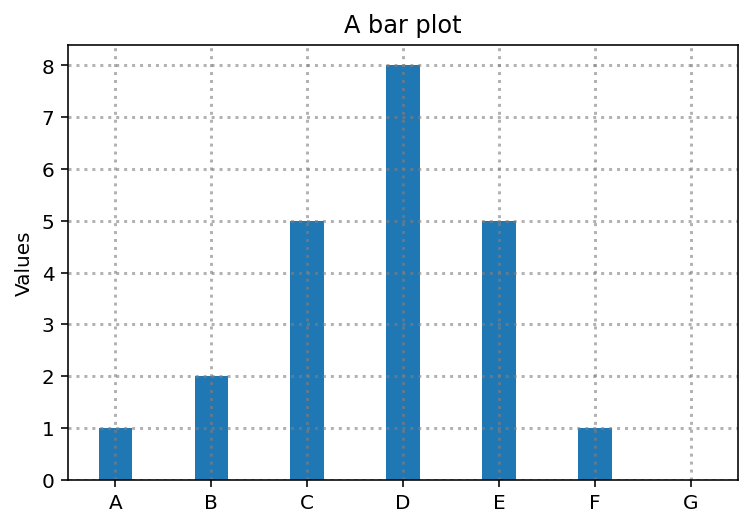

In [97]:
labels = ['A','B','C','D','E','F','G']
values = np.array([1,2,5,8,5,1,0])

width = 0.35  # Bar width

x = np.arange(len(labels))

fig, ax = plt.subplots()
rect = ax.bar(x, values, width=width)
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
plt.xticks(x,labels)
plt.ylabel('Values')
plt.title('A bar plot')
plt.show()


### More examples: array of plots and text over figures

You can easily create arrays of plots to visualize them together. Here's an example. Also, we show how to include annotations in the figures.

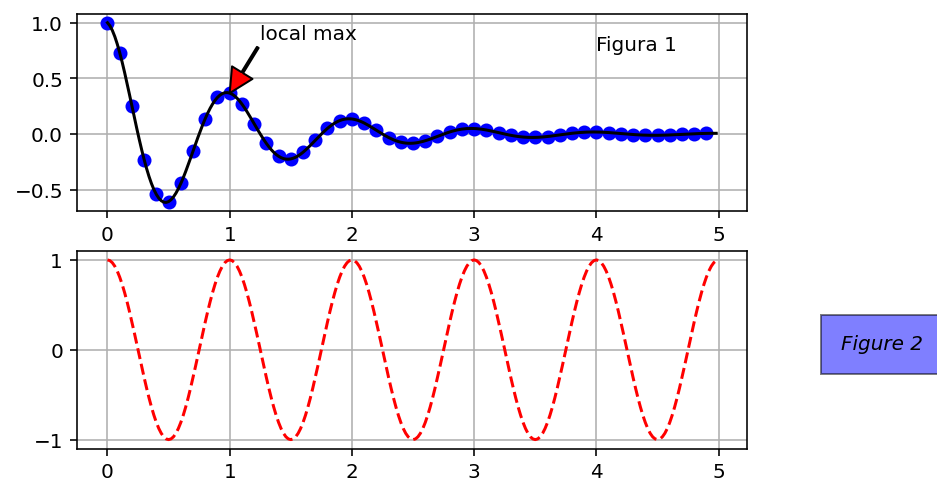

In [98]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')
num_figure = 1
plt.annotate('local max', xy=(1, f(1)), xytext=(1.25, 0.85),
             arrowprops=dict(facecolor='red', width = 1))
plt.text(4, 0.75, "Figura {0:d}".format(num_figure))
plt.grid()

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')

plt.text(6, 0, "Figure {0:d}".format(num_figure+1), style='italic',
        bbox={'facecolor': 'blue', 'alpha': 0.5, 'pad': 10})
plt.grid()
plt.show()

### More examples: contour and surface plots

These plots are handy to represent functions over 2 dimensional spaces. 


In [99]:
# We consider the following function with 2D inputs

def f(x,y):
    return np.exp((+x**2-y**2+x*y+x-y)/20)

<ipython-input-100-fb58aa0f1ee0>:34: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar()


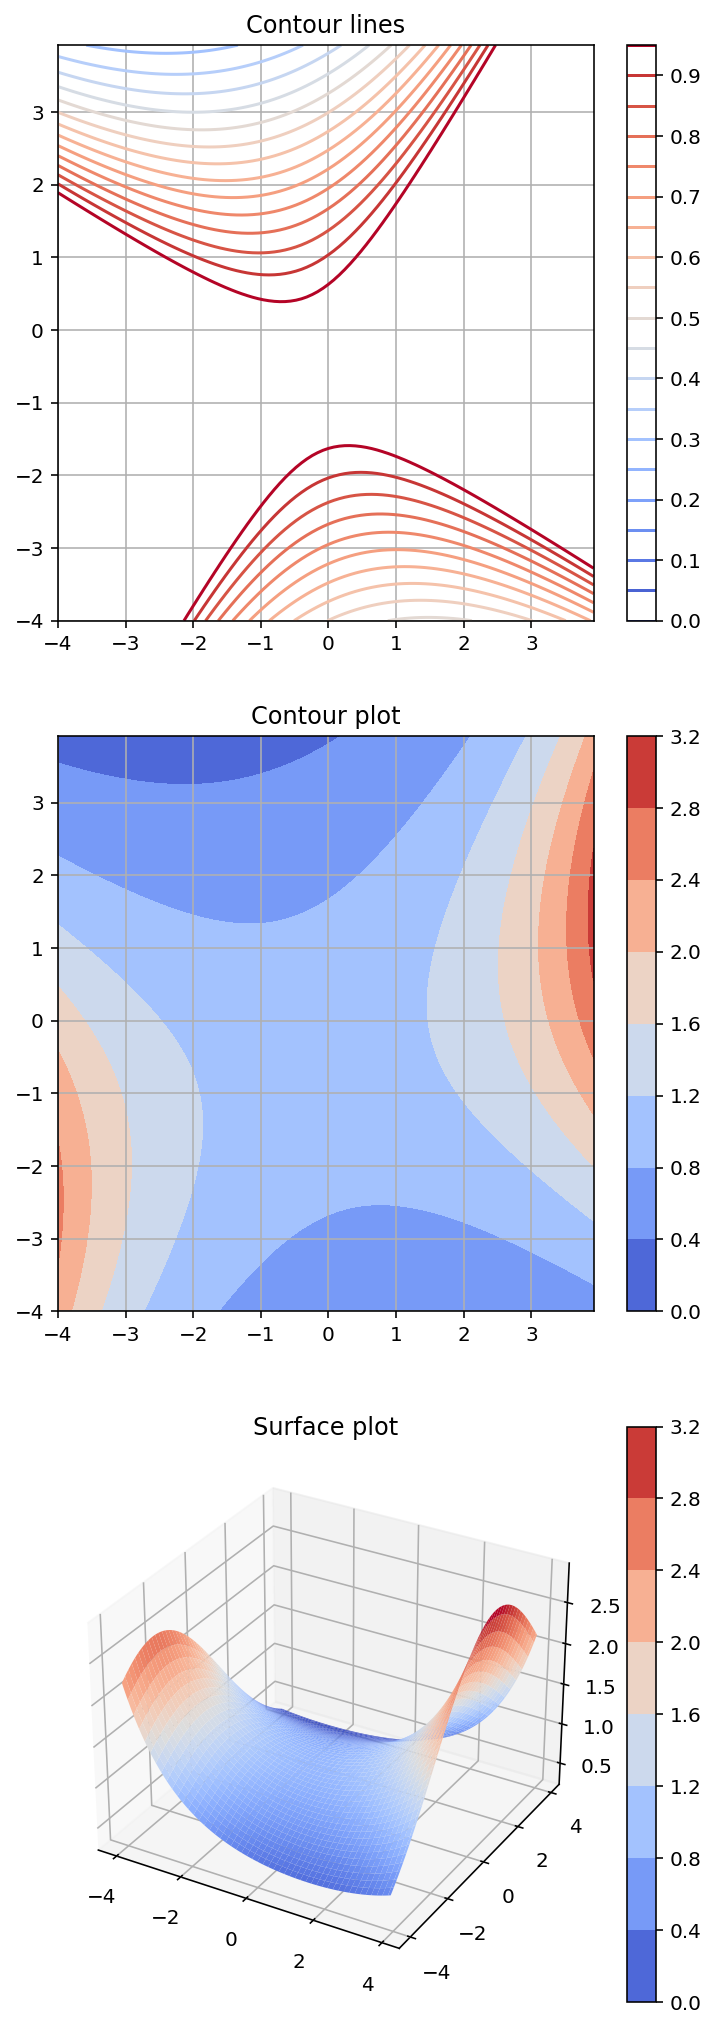

In [100]:
from mpl_toolkits.mplot3d import Axes3D

# Lets start with a contour plot

grid_points = 100
lims = 4
# Grid of grid_points**2 points in the [-2,2] square
x,y = np.mgrid[-lims:lims:2*lims/grid_points, -lims:lims:2*lims/grid_points]
grid = np.transpose(np.row_stack([x.ravel(), y.ravel()]))

# Lets evaluate the function over the grid

f_grid = f(grid[:,0],grid[:,1]).reshape([grid_points,grid_points])

fig = plt.figure(figsize=(6, 18))

# Contour lines
plt.subplot(311)
plt.contour(x,y,f_grid,np.arange(0,1,0.05),cmap='coolwarm') # We plot the 0, 0.1, 0.2, ..., 1.0 contour lines
plt.colorbar()
plt.grid()
plt.title("Contour lines")

# Contour plot
plt.subplot(312)
plt.contourf(x,y,f_grid,cmap='coolwarm') 
plt.colorbar()
plt.grid()
plt.title("Contour plot")

# Surface plot
ax = fig.add_subplot(3, 1, 3, projection='3d')
ax.plot_surface(x,y,f_grid,cmap='coolwarm') 
plt.colorbar()
plt.grid()
plt.title("Surface plot")

plt.show()



### Working with pandas dataframes

(0.0, 7500.0)

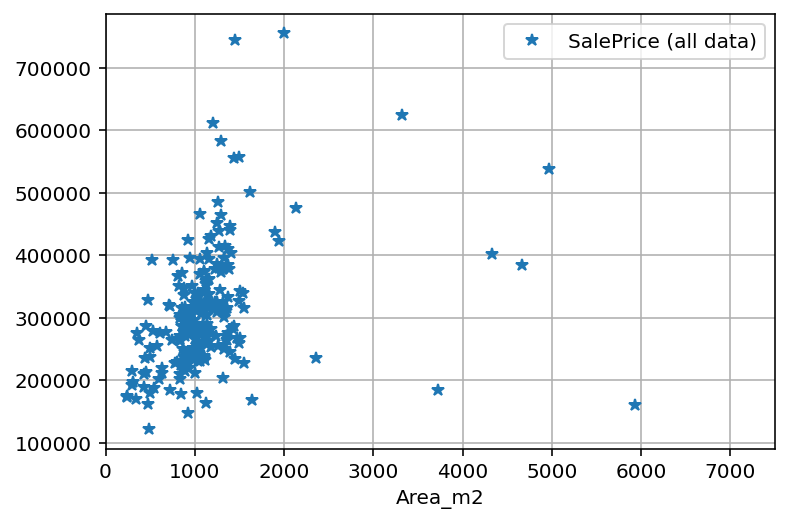

In [101]:
plt.plot(good_houses['Area_m2'],good_houses['SalePrice'],'*')
plt.legend(['SalePrice (all data)','SalePrince (good houses)'])
plt.xlabel('Area_m2')
plt.grid(True)
plt.xlim([0,7500])

Text(0.5, 1.0, 'A plot with two scales')

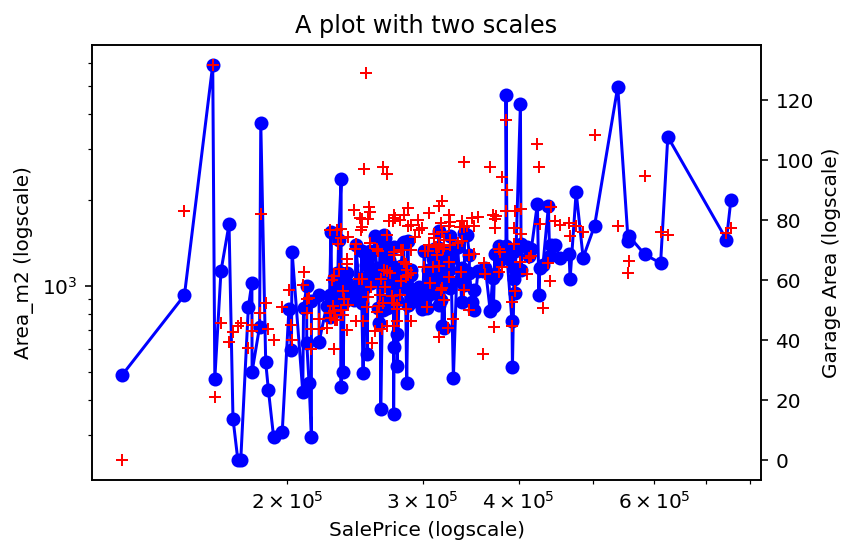

In [102]:
good_houses.sort_values(['SalePrice'],ascending=True,inplace=True) #We order the data according to SalePrice

# Create axes
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.loglog(good_houses['SalePrice'], good_houses['Area_m2'], color='blue',marker='o')
ax.set_xlabel('SalePrice (logscale)')
ax.set_ylabel('Area_m2 (logscale)')
ax2.semilogx(good_houses['SalePrice'],good_houses[['GarageArea']].apply(lambda d: sfoot_to_smeter(d)), color='red',marker='+',linewidth=0)
ax2.set_ylabel('Garage Area (logscale)')

ax.set_title('A plot with two scales')

## More about plotting with `matplotlib()` library


You should consult [matplotlib documentation](https://matplotlib.org/index.html) for tons of examples and options.

You can also improve your matplotlib skills with the following resources:
* DataCamp’s [Intermediate Python For Data Science](https://www.datacamp.com/courses/intermediate-python-for-data-science) for an introduction to Matplotlib,
* [Matplotlib Tutorial](https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python),
* [Matplotlib cheat sheet](https://www.datacamp.com/community/blog/python-matplotlib-cheat-sheet), and
* [Viewing Volumetric 3D Data with Matplotlib](https://www.datacamp.com/community/tutorials/matplotlib-3d-volumetric-data) tutorial on matplotlib’s event handler API.

# 5. Seaborn

Seaborn is a library for making statistical graphics in Python. It builds on top of `matplotlib` and integrates closely with pandas data structures.

Seaborn helps you explore and understand your data. Its plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots. Its dataset-oriented, declarative API lets you focus on what the different elements of your plots mean, rather than on the details of how to draw them.

https://seaborn.pydata.org/introduction.html


## Our first seaborn plot

Here there is an example of what seaborn can do:

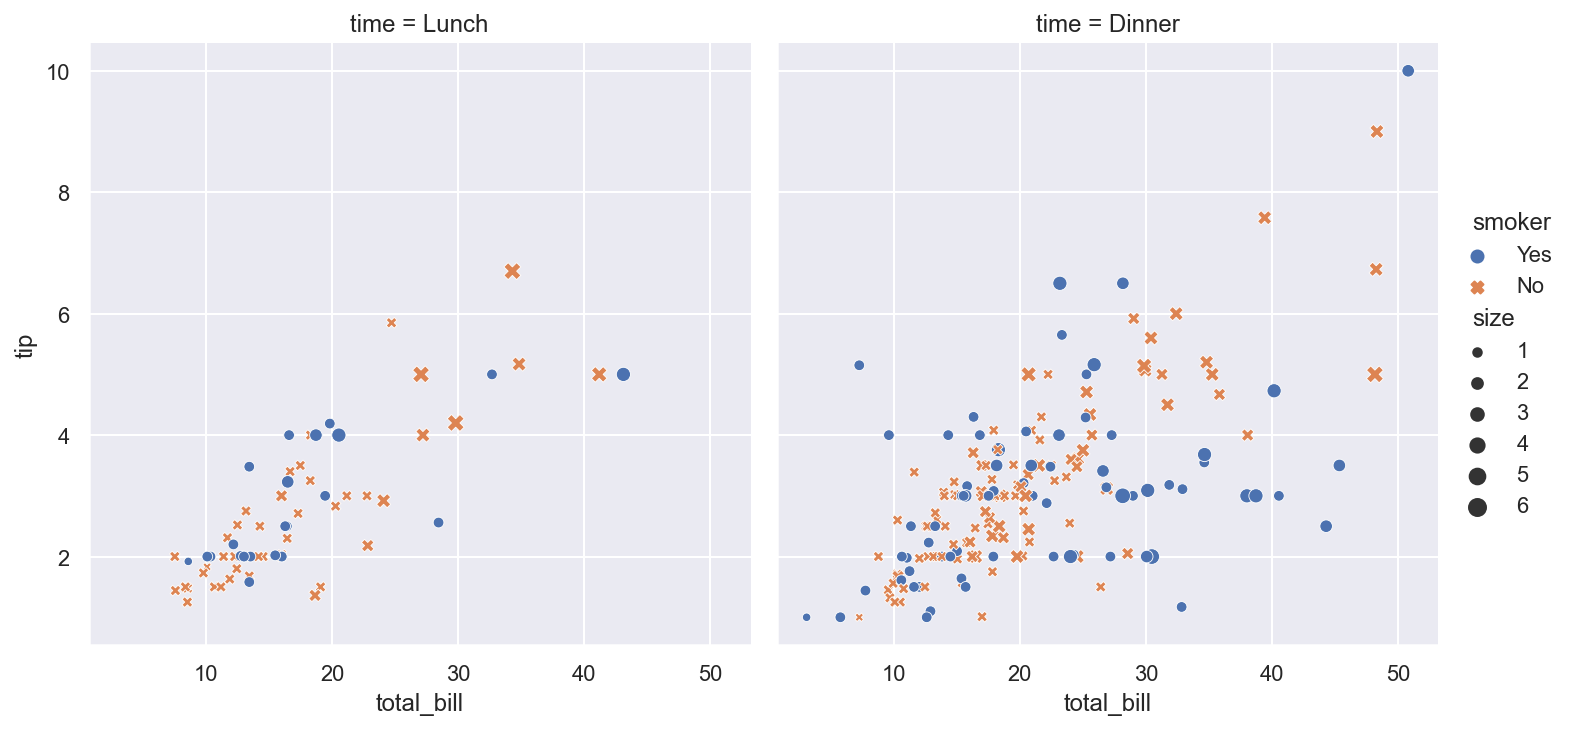

In [103]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")

# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

A few things have happened here. Let’s go through them one by one:

In [104]:
# Import seaborn
import seaborn as sns

Seaborn is the only library we need to import for this simple example. By convention, it is imported with the shorthand `sns`.

Behind the scenes, seaborn uses matplotlib to draw its plots. For interactive work, it’s recommended to use a Jupyter/IPython interface in matplotlib mode, or else you’ll need to use `plt.show()` to make the image appear to you. 

In [105]:
# Apply the default theme
sns.set_theme()

This uses the [matplotlib rcParam system](https://matplotlib.org/users/customizing.html) and will affect how all matplotlib plots look, even if you don’t make them with seaborn. Beyond the default theme, there are [several other options](https://seaborn.pydata.org/tutorial/aesthetics.html), and you can independently control the style and scaling of the plot. If you like the matplotlib defaults or prefer a different theme, you can skip this step and still use the seaborn plotting functions.

In [106]:
# Load an example dataset
tips = sns.load_dataset("tips")
tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

Most code in the docs will use the `load_dataset()` function to get quick access to an example dataset. There’s nothing special about these datasets: they are just pandas dataframes, and we could have loaded them with `pandas.read_csv()`. To get an overview or inspect all data sets that this function opens up to you, go [here](https://github.com/mwaskom/seaborn-data).

Of course, you can also work with your own data and not the built-in data sets of the Seaborn library. Seaborn works best with pandas DataFrames and arrays that contain a whole data set.

The reason why Seaborn is so great with DataFrames is, for example, because labels from DataFrames are automatically propagated to plots or other data structures, as you saw in the previous example (see `smoker` and `size` variables). This already takes a lot of work away from you.

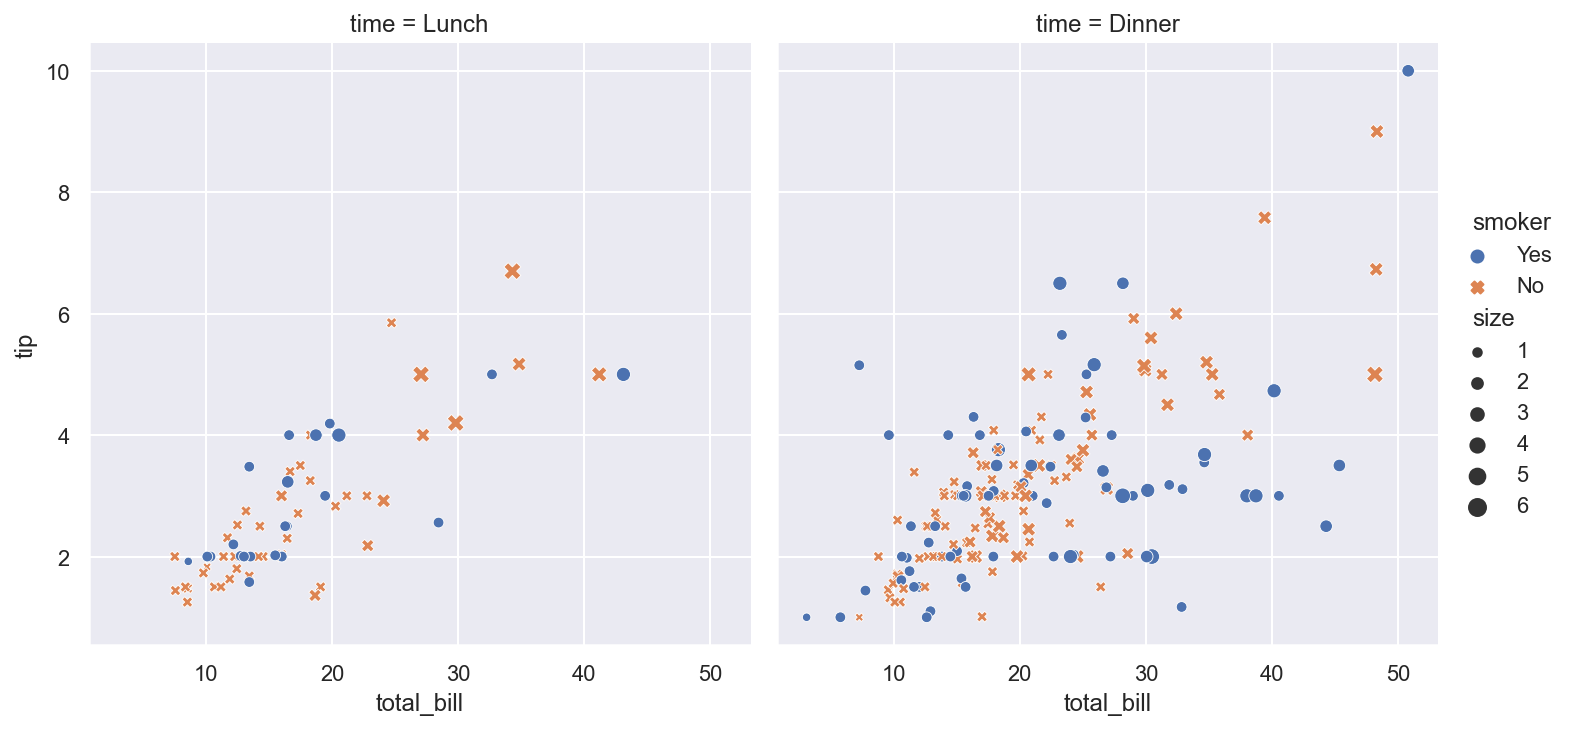

In [107]:
# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker",  size="size", style="smoker"
)


This plot shows the relationship between five variables in the tips dataset using a single call to the seaborn function `relplot()`. Notice how we provided only the names of the variables and their roles in the plot:
* `x="total_bill"` and `y="tip"` indicate the variables on the x and y axes.
* `col="time"` specify variables that define subsets to plot on different facets (rows and columns, in this case we only define columns).
* `hue="smoker"` is a grouping variable that will produce elements with different colors. 
* `size="size"` is other grouping variable that will produce elements with different sizes. 
* `style="smoker"` is other grouping variable that will produce elements with different styles ('dots'  and 'crosses'). 

These grouping variables can be either categorical or numeric, although color mapping/ size/ style will behave differently in latter case.


Note that, unlike when using matplotlib directly, it wasn’t necessary to specify attributes of the plot elements in terms of the color values or marker codes. Behind the scenes, seaborn handled the translation from values in the dataframe to arguments that matplotlib understands. This declarative approach let's you stay focused on the questions that you want to answer, rather than on the details of how to control matplotlib.



## Seaborn visual representations

There is no universally best way to visualize data. Different questions are best answered by different plots. Seaborn makes it easy to switch between different visual representations.

The function `relplot()` is named that way because it is designed to visualize many different statistical relationships. While scatter plots are often effective, relationships where one variable represents a measure of time are better represented by a line. The `relplot()` function has a convenient kind parameter that let's you easily switch to this alternate representation:

In [108]:
dots = sns.load_dataset("dots")
dots


align choice  time  coherence  firing_rate
0    dots     T1   -80        0.0    33.189967
1    dots     T1   -80        3.2    31.691726
2    dots     T1   -80        6.4    34.279840
3    dots     T1   -80       12.8    32.631874
4    dots     T1   -80       25.6    35.060487
..    ...    ...   ...        ...          ...
843  sacc     T2   300        3.2    33.281734
844  sacc     T2   300        6.4    27.583979
845  sacc     T2   300       12.8    28.511530
846  sacc     T2   300       25.6    27.009804
847  sacc     T2   300       51.2    30.959302

[848 rows x 5 columns]

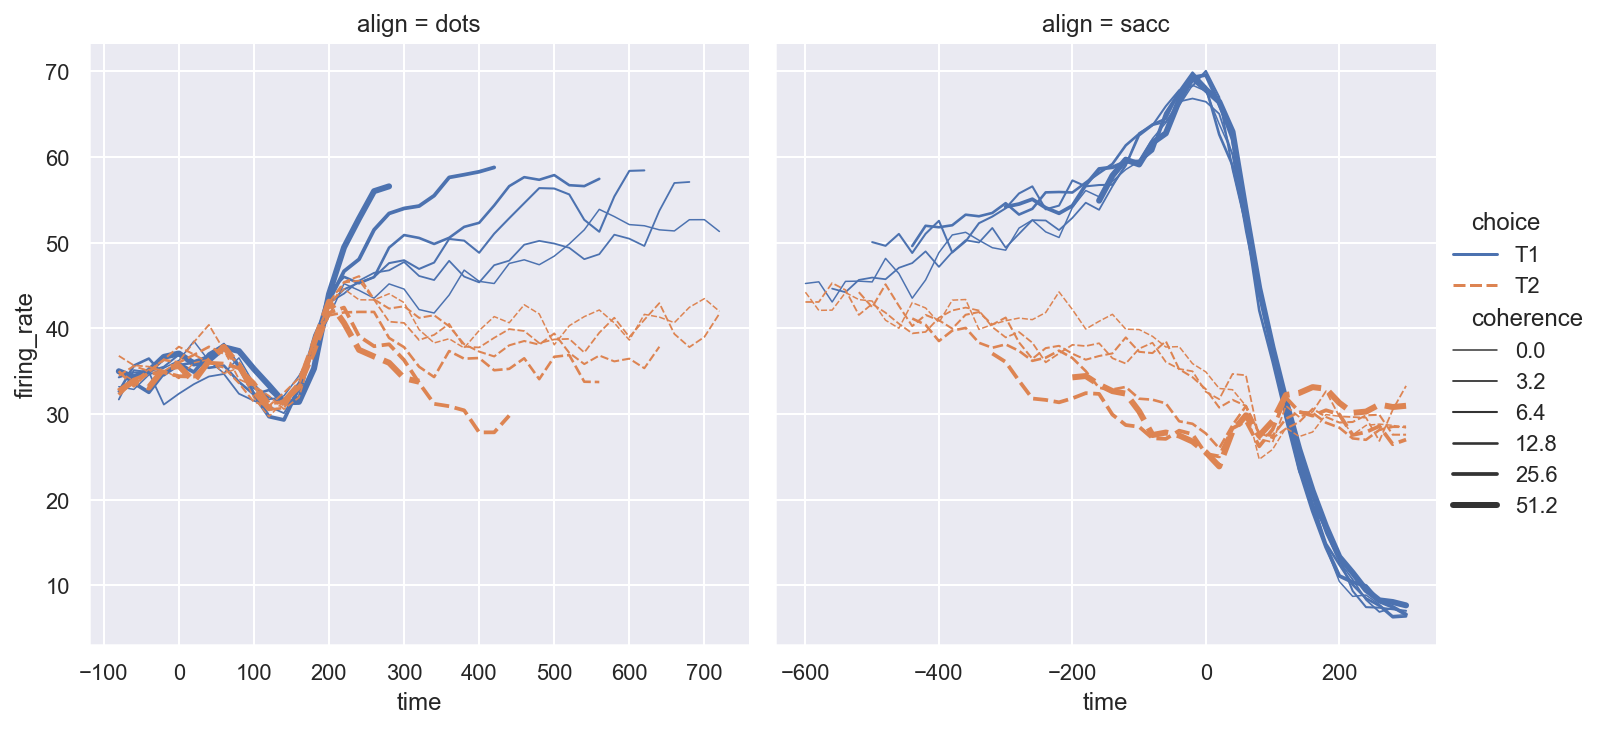

In [109]:
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)

Notice how the `size` and `style` parameters are used in both the scatter and line plots, but they affect the two visualizations differently: changing the marker area and symbol in the scatter plot vs the line width and dashing in the line plot. We did not need to keep those details in mind, letting us focus on the overall structure of the plot and the information we want it to convey.

With the parameter `facet_kws` we can pass a dictionary of other keyword arguments to pass to `FacetGrid` object. In this case, `facet_kws=dict(sharex=False)` indicates that the axis x is not shared between the facets.


## Statistical estimation and error bars

Often, we are interested in the average value of one variable as a function of other variables. Many seaborn functions will automatically perform the statistical estimation that is necessary to answer these questions:

In [110]:
fmri = sns.load_dataset("fmri")
fmri

subject  timepoint event    region    signal
0        s13         18  stim  parietal -0.017552
1         s5         14  stim  parietal -0.080883
2        s12         18  stim  parietal -0.081033
3        s11         18  stim  parietal -0.046134
4        s10         18  stim  parietal -0.037970
...      ...        ...   ...       ...       ...
1059      s0          8   cue   frontal  0.018165
1060     s13          7   cue   frontal -0.029130
1061     s12          7   cue   frontal -0.004939
1062     s11          7   cue   frontal -0.025367
1063      s0          0   cue  parietal -0.006899

[1064 rows x 5 columns]

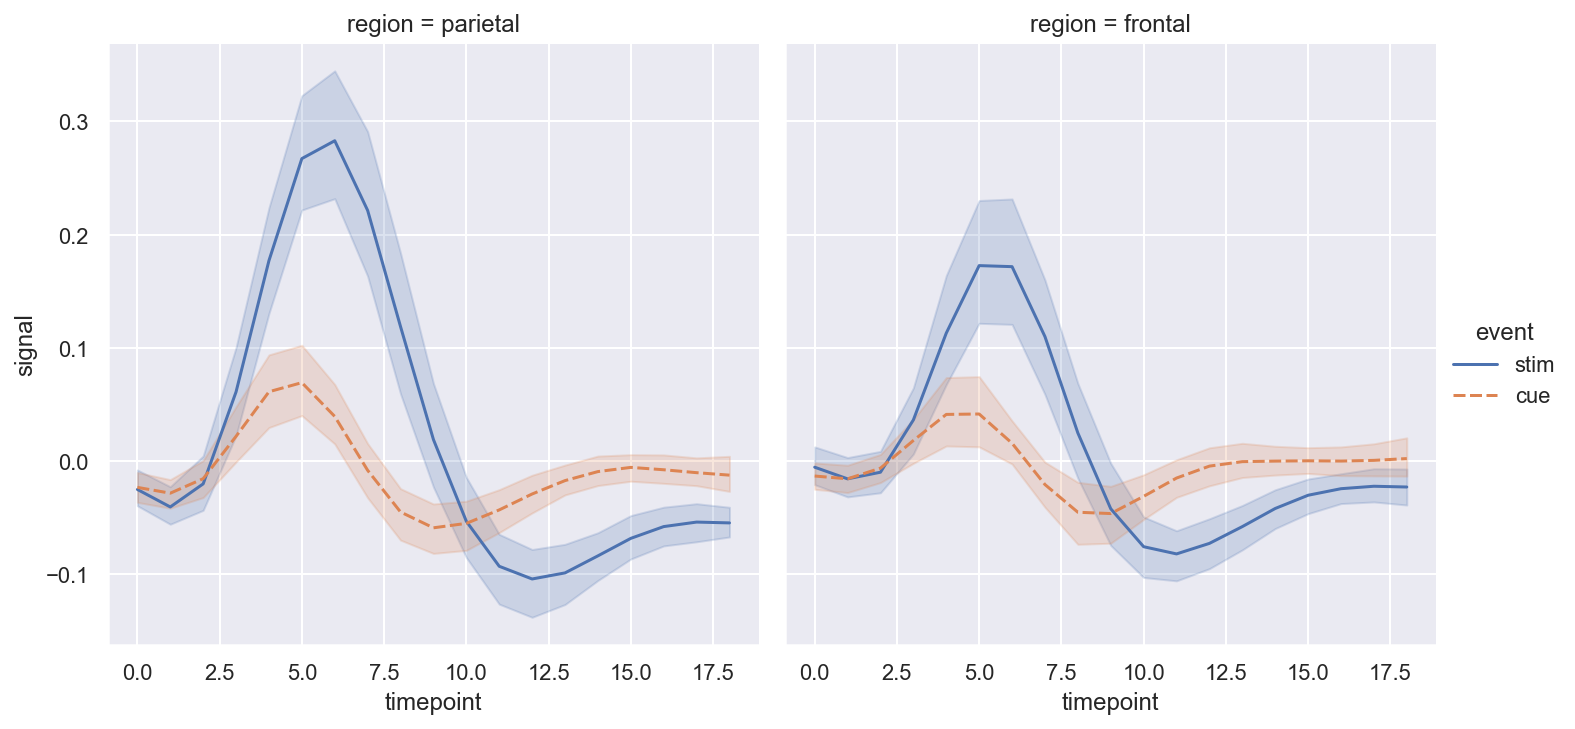

In [111]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event"
)

When statistical values are estimated, seaborn will use **bootstrapping to compute confidence intervals** and draw error bars representing the uncertainty of the estimate. That is, we compute many estimations of the mean values (with subsampled subsets) so that we can approximate the distribution of the mean value and obtain its confidence interval.

Statistical estimation in seaborn goes beyond descriptive statistics. For example, it is possible to enhance a scatterplot by including a **linear regression model** (and its uncertainty) using `lmplot()`:

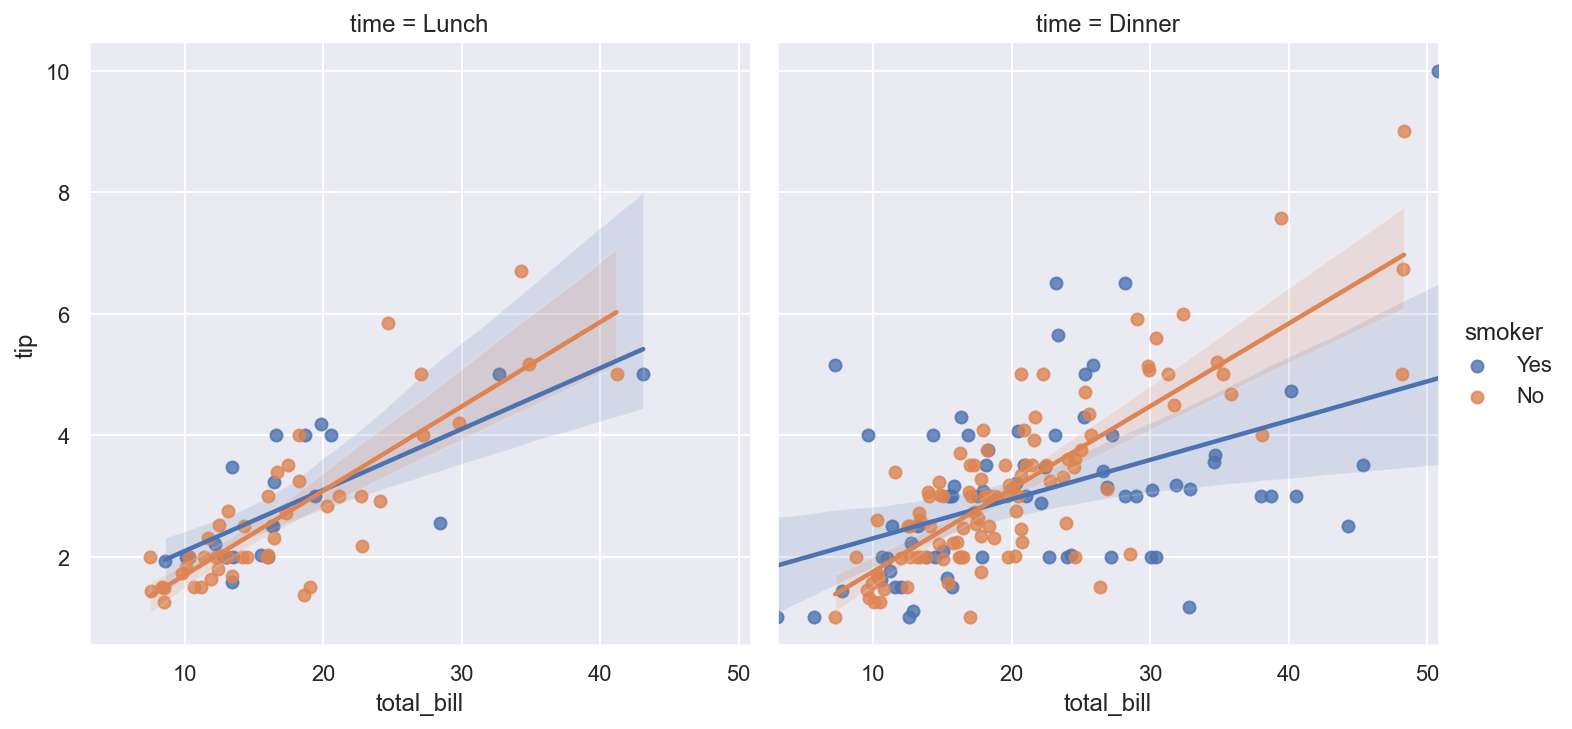

In [112]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")

## Informative distributional summaries

Statistical analyses require knowledge about the distribution of variables in your dataset. The seaborn function `displot()` supports several approaches to visualizing distributions. These include classic techniques like histograms and computationally-intensive approaches like **kernel density estimation**:

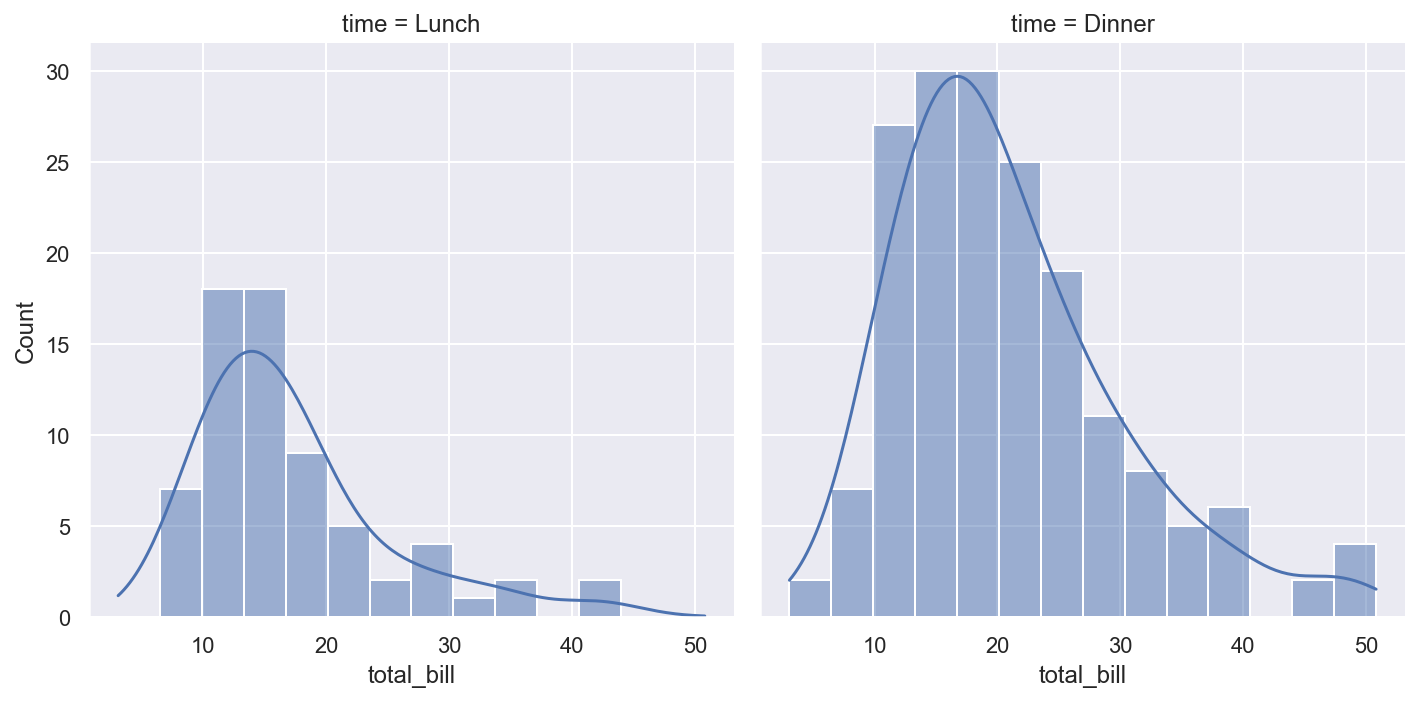

In [113]:
sns.displot(data=tips, x="total_bill", col="time", kde=True)

Seaborn also tries to promote techniques that are powerful but less familiar, such as calculating and plotting the empirical **cumulative distribution function** of the data:

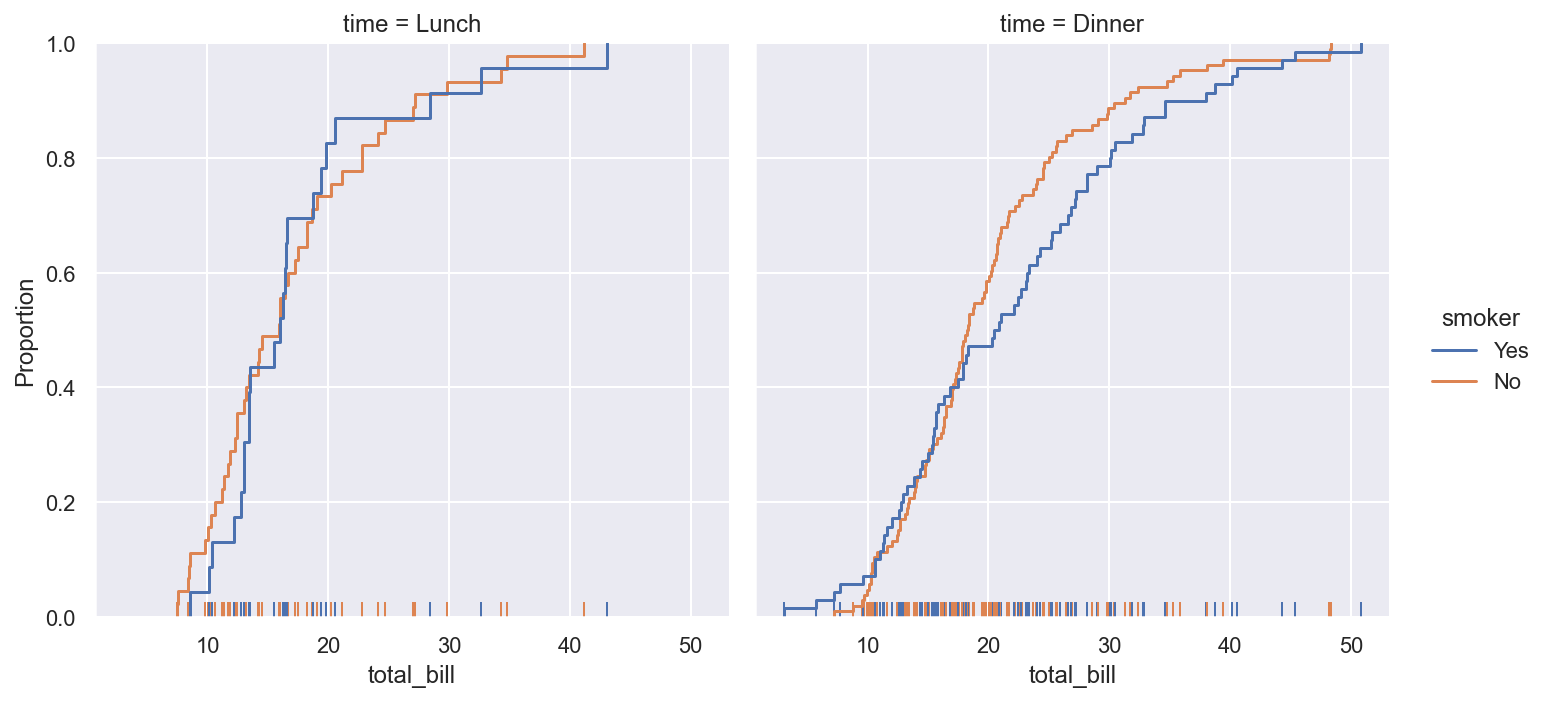

In [114]:
sns.displot(data=tips, kind="ecdf", x="total_bill", col="time", hue="smoker", rug=True)

## Plots for categorical data

Several specialized plot types in seaborn are oriented towards visualizing categorical data. They can be accessed through `catplot()`. These plots offer different levels of granularity. At the finest level, you may wish to see every observation by drawing a “swarm” plot, a scatter plot that adjusts the positions of the points along the categorical axis so that they don’t overlap.

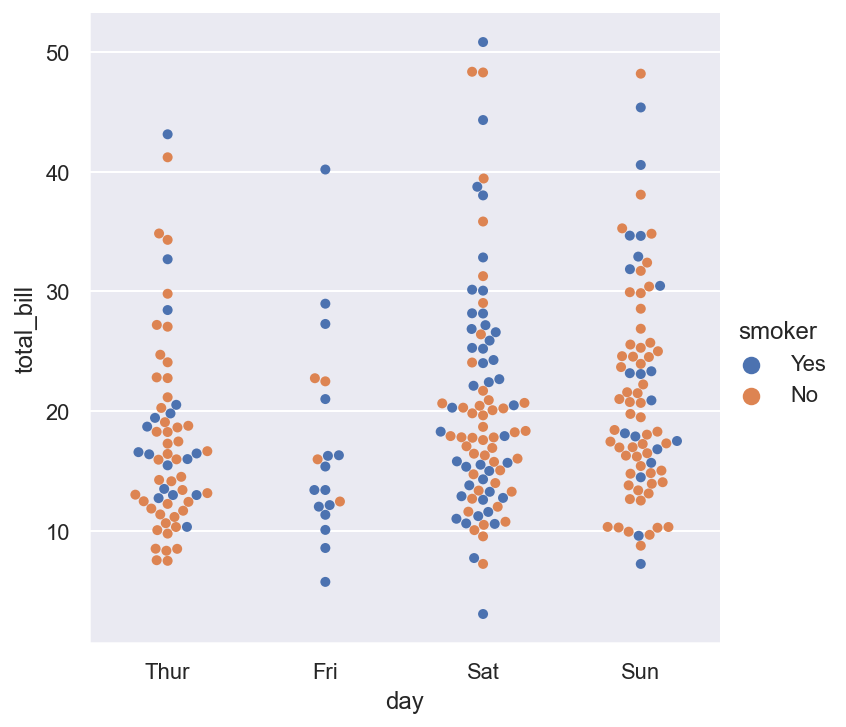

In [115]:
sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker")

Alternately, you could use kernel density estimation to represent the underlying distribution that the points are sampled from:

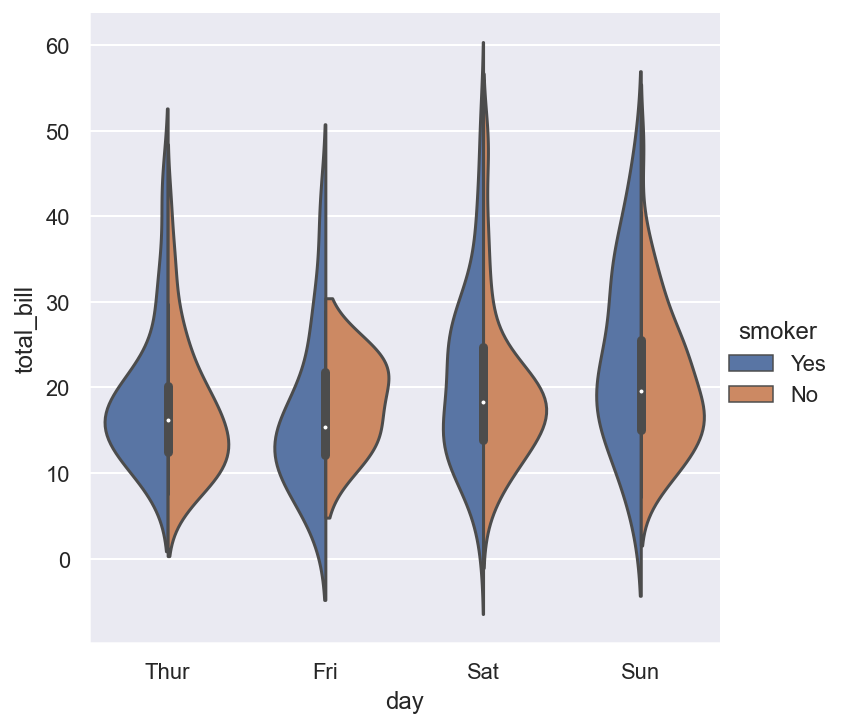

In [116]:
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)

Or you could show only the mean value and its confidence interval within each nested category:

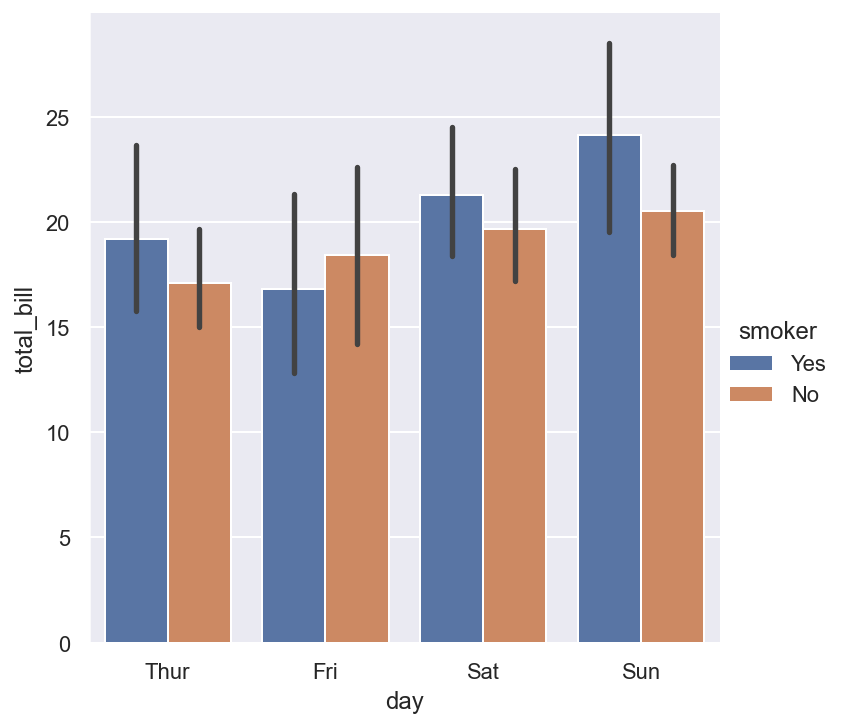

In [117]:
sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker")

## Composite views onto multivariate datasets

Some seaborn functions combine multiple kinds of plots to quickly give informative summaries of a dataset. One, `jointplot()`, focuses on a single relationship. It plots the joint distribution between two variables along with each variable’s marginal distribution:

In [118]:
penguins = sns.load_dataset("penguins")
penguins

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

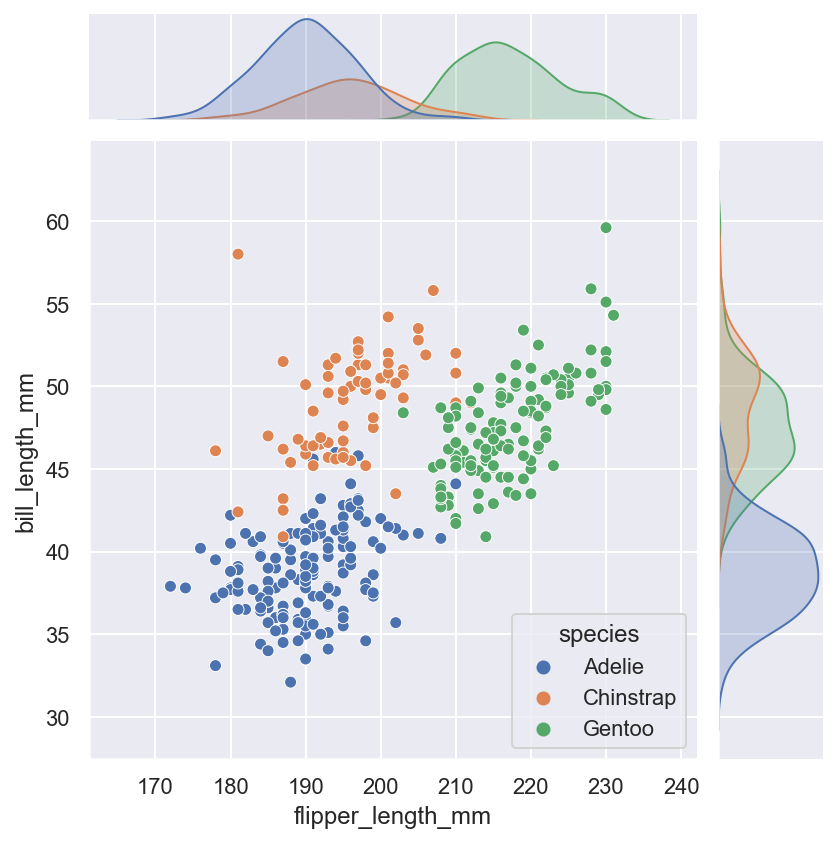

In [119]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

The other, `pairplot()`, takes a broader view since it shows joint and marginal distributions for all pairwise relationships and for each variable, respectively.

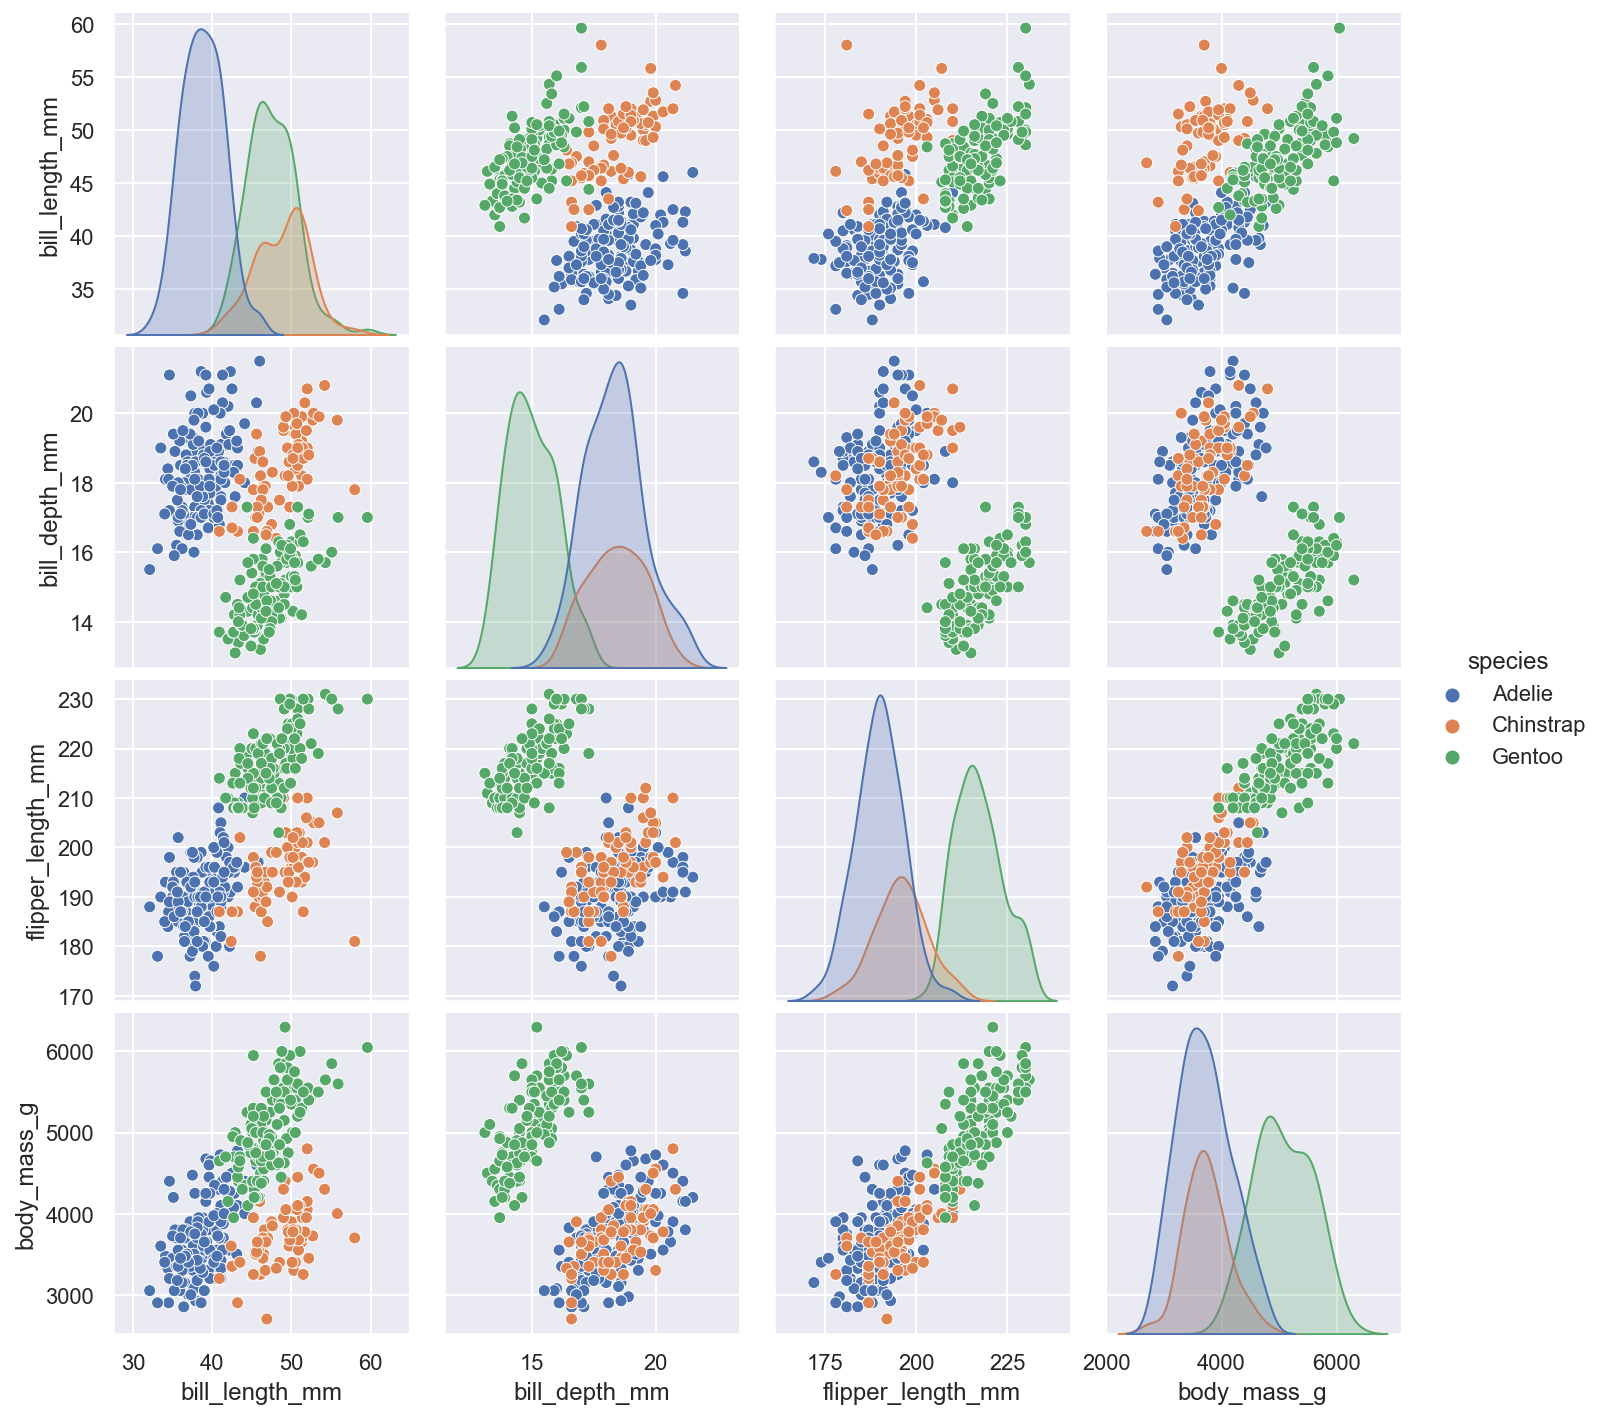

In [120]:
sns.pairplot(data=penguins, hue="species")

## Classes and functions for making complex graphics

These tools work by combining axes-level plotting functions with objects that manage the layout of the figure, linking the structure of a dataset to a grid of axes. Both elements are part of the public API, and you can use them directly to create complex figures with only a few more lines of code:

c:\users\sergi\desktop\university\2. machine learning applications\venv\lib\site-packages\seaborn\relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)
c:\users\sergi\desktop\university\2. machine learning applications\venv\lib\site-packages\seaborn\relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)
c:\users\sergi\desktop\university\2. machine learning applications\venv\lib\site-packages\seaborn\relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points =

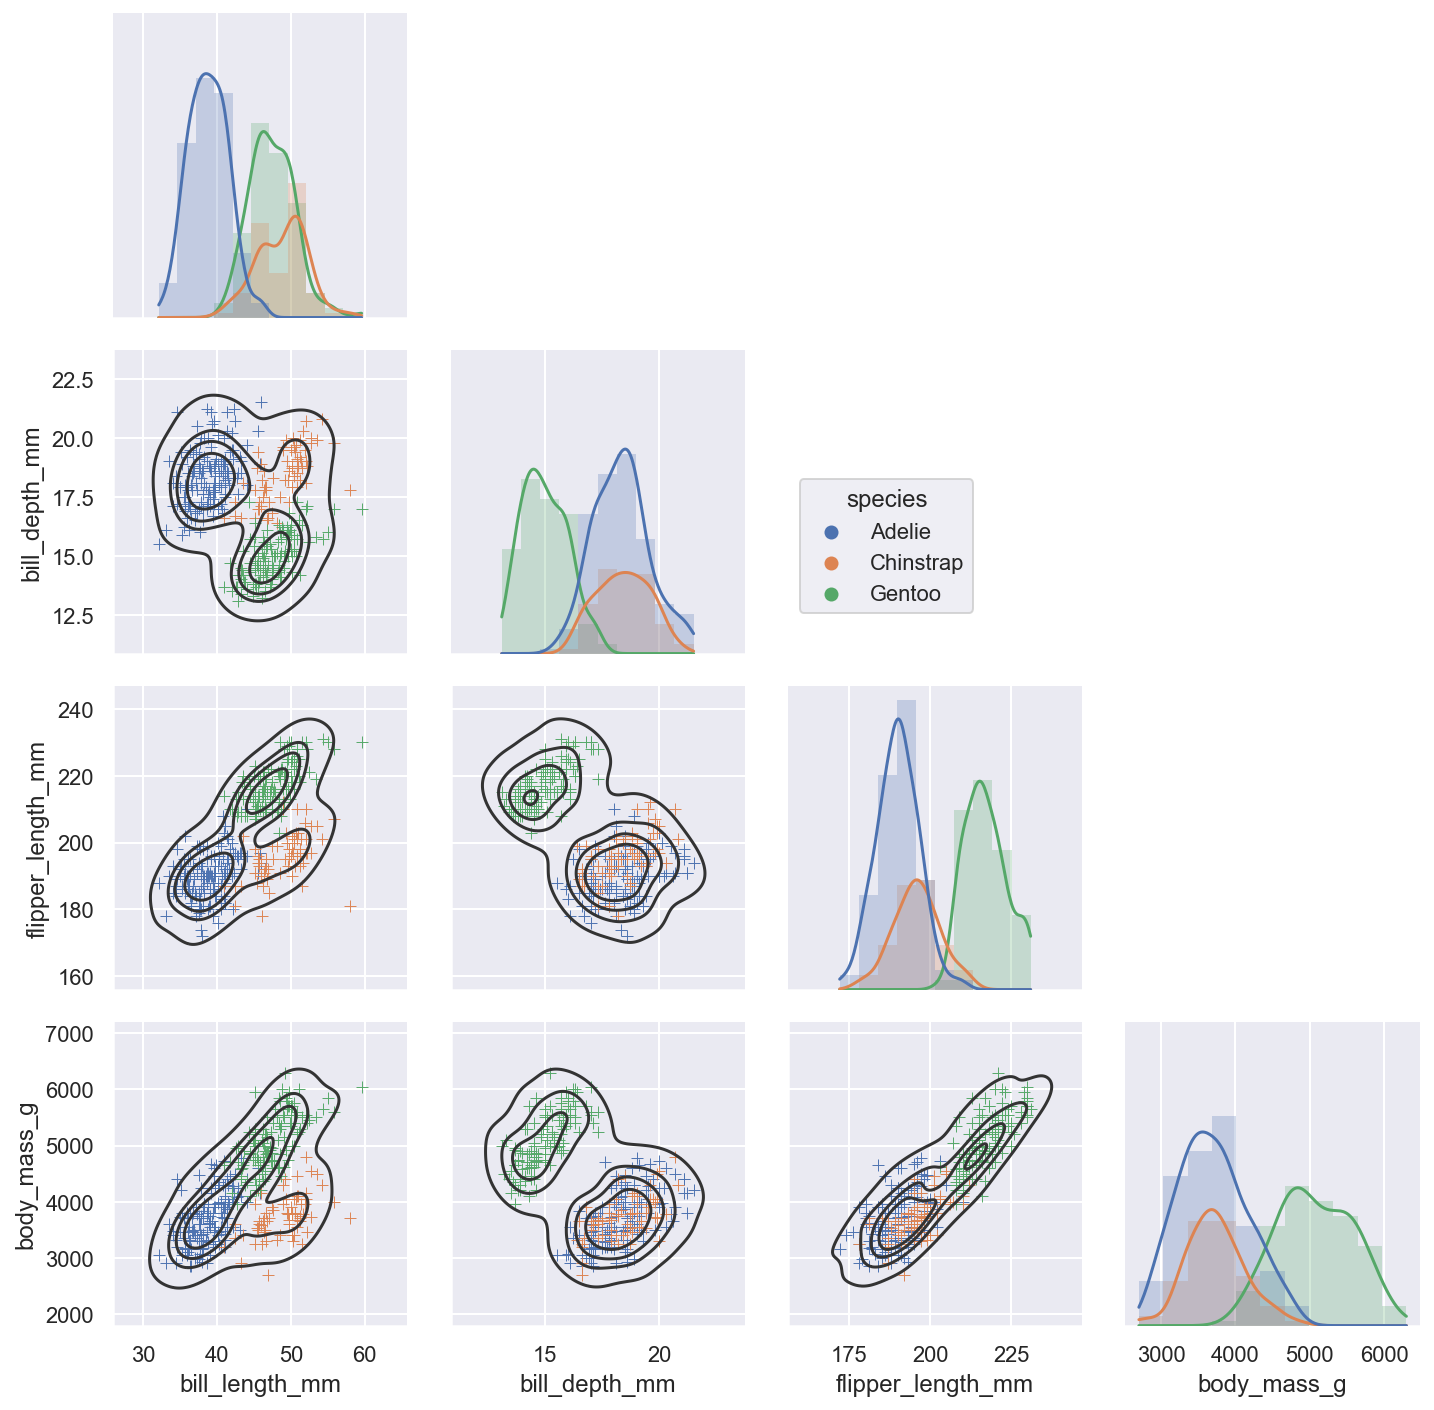

In [121]:
g = sns.PairGrid(penguins, hue="species", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

## Opinionated defaults and flexible customization

Seaborn creates complete graphics with a single function call; when possible, its functions will automatically add informative axis labels and legends that explain the semantic mappings in the plot.

In many cases, seaborn will also choose default values for its parameters based on characteristics of the data. For example, the color mappings that we have seen so far used distinct hues (blue, orange, and sometimes green) to represent different levels of the categorical variables assigned to hue. When mapping a numeric variable, some functions will switch to a continuous gradient:

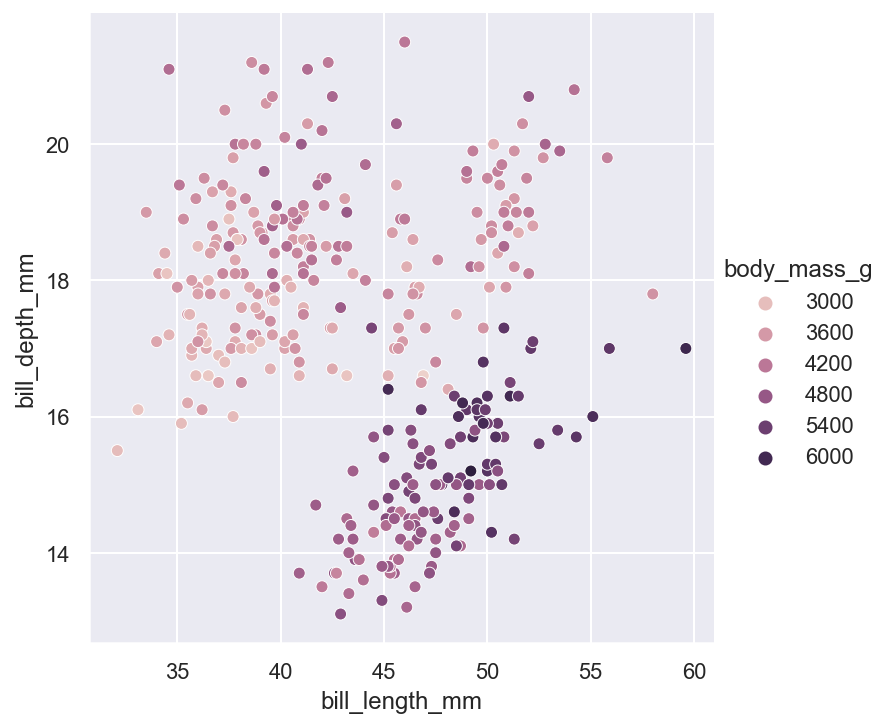

In [122]:
sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g"
)


When you’re ready to share or publish your work, you’ll probably want to polish the figure beyond what the defaults achieve. Seaborn allows for several levels of customization. It defines multiple built-in themes that apply to all figures, its functions have standardized parameters that can modify the semantic mappings for each plot, and additional keyword arguments are passed down to the underlying matplotlib, allowing even more control. Once you’ve created a plot, its properties can be modified through both the seaborn API and by dropping down to the matplotlib layer for fine-grained tweaking.

c:\users\sergi\desktop\university\2. machine learning applications\venv\lib\site-packages\seaborn\relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


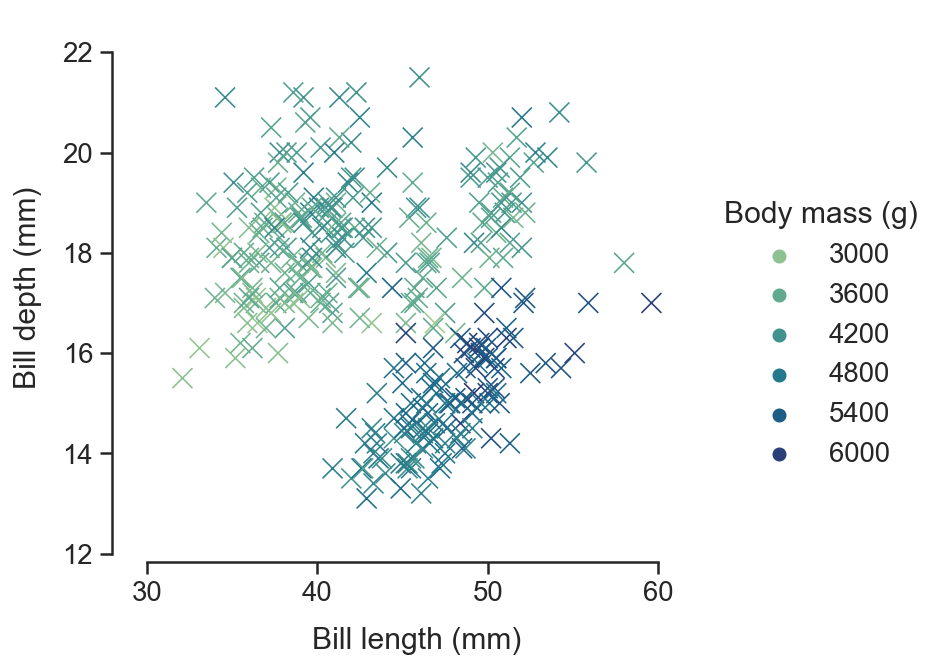

In [123]:
sns.set_theme(style="ticks", font_scale=1.25)
g = sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g",
    palette="crest", marker="x", s=100,
)
g.set_axis_labels("Bill length (mm)", "Bill depth (mm)", labelpad=10)
g.legend.set_title("Body mass (g)")
g.fig.set_size_inches(6.5, 4.5)
g.ax.margins(.15)
g.despine(trim=True)